<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#AcquireExercises">Acquire Exercises</a></li>
<li><a href="#Acquirepy">Acquire.py Testing</a></li>
<li><a href="#PrepareExercises">Prepare Exercises</a></li>
<li><a href="#TidyExercises">Tidy Exercises</a></li>
<li><a href="#ExploratoryExercisesPartI">Exploratory Exercises - Part I</a></li>
<li><a href="#ExploratoryExercisesPartII">Exploratory Exercises - Part II</a></li>
<li><a href="#ExploratoryExercisesPartIII">Exploratory Exercises - Part III</a></li>
<li><a href="#Misc">Miscellaneous</a></li>

### Acquisition:
 - Objectives:
     - Find out where our data is
     - Figure out the appropriate method to obtain our data
     - Actually obtain the data
     - Construct a replicable means of acquiring that data on a modular level*

In [1]:
# Copy portion you want then run this command
# pd.read_clipboard()

## Notes:
 - read_clipboard is fairly fragile.
 - It will do its best, but can often break or corrupt your information that you want
 - It may be best practice to reformat the data that you put in your clipboard by savign it in a csv or other text file before readint it into a pandas dataframe
 - If we want to take raw text data off of a web page, this will require often a little bit of extra manipulation regarding strings, content, html, regex, and other topics that we will dive further on into inside of our other methodologies

<a id="AcquireExercises"></a>
# Acquire Exercises
<li><a href="#TableOfContents">Table of Contents</li></a>

##### 1. Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.
COMPLETED

##### 2. Inside of your local classification-exercises repo, create a file named .gitignore with the following contents: env.py .DS_Store .ipynb_checkpoints/ __pycache__ *.csv Add and commit your .gitignore file before moving forward.
COMPLETED

##### 3. Now that you are 100% sure that your .gitignore file lists env.py, create or copy your env.py file inside of classification-exercises. Running git status should show that git is ignoring this file.
COMPLETED

<a id='imports'></a>
# IMPORTS:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pydataset import data
import env
import acquire
import prepare
import explore
import evaluation
import itertools

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [3]:
df_iris = data('iris')

##### 4a. Print the first 3 rows

In [4]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


##### 4b. Print the number of rows and columns (shape)

In [5]:
df_iris.shape

(150, 5)

##### 4c. Print the column names

In [6]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

##### 4d. Print the data type of each column

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


##### 4e. Print the summary statistics for each of the numeric variables

In [8]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5. Read the data from this google sheet into a dataframe, df_google.

In [9]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

##### 5a. print the first 3 rows

In [10]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


##### 5b. print the number of rows and columns

In [11]:
df_google.shape

(891, 12)

##### 5c. print the column names

In [12]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### 5d. print the data type of each column

In [13]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 5e. print the summary statistics for each of the numeric variables

In [14]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 5f. print the unique values for each of your categorical variables

In [15]:
df_google.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [16]:
df_excel = pd.read_excel('train.xlsx')

##### 6a. assign the first 100 rows to a new dataframe, df_excel_sample

In [17]:
df_excel_sample = df_excel.head(100)

##### 6b. print the number of rows of your original dataframe

In [18]:
df_excel.shape[0]

891

##### 6c. print the first 5 column names

In [19]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

##### 6d. print the column names that have a data type of object

In [20]:
df_excel.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

##### 6e. compute the range for each of the numeric variables.

In [21]:
numeric_col = df_excel.select_dtypes(include=['float', 'int']).columns
for col in numeric_col:
    col_min = df_excel[col].min()
    col_max = df_excel[col].max()
    col_range = col_max - col_min
    print(f'Range for {col}: {col_range}')

Range for PassengerId: 890
Range for Survived: 1
Range for Pclass: 2
Range for Age: 79.58
Range for SibSp: 8
Range for Parch: 6
Range for Fare: 512.3292


<a id="Acquirepy"></a>
# Acquire.py Testing
<li><a href="#TableOfContents">Table of Contents</li></a>

In [22]:
# Acquire titanic dataset and alias as titanic_df
titanic_df = acquire.get_titanic_data()


In [23]:
# Acquire iris dataset and alias as iris_df
iris_df = acquire.get_iris_data()
iris_df.sample()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
62,2,63,6.0,2.2,4.0,1.0,versicolor


In [24]:
# Acquire telco_churn dataset and alias as telco_df
telco_df = acquire.get_telco_data()
telco_df.sample()

,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
264,3,4,3,0394-YONDK,Male,0,Yes,Yes,70,Yes,...,No internet service,No internet service,No internet service,No,25.15,1790.15,No,None,Credit card (automatic),Two year


<a id="PrepareExercises"></a>
# Prepare Exercises
<li><a href="#TableOfContents">Table of Contents</li></a>

##### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

##### This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

### 1. Using the Iris Data:

##### 1a. Use the function defined in acquire.py to load the iris data.

In [25]:
iris_db = acquire.get_iris_data()
iris_db.sample()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
86,2,87,6.7,3.1,4.7,1.5,versicolor


##### 1b. Drop the species_id and measurement_id columns.

In [26]:
iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])
iris_db.sample()

,sepal_length,sepal_width,petal_length,petal_width,species_name
83,6.0,2.7,5.1,1.6,versicolor


##### 1c. Rename the species_name column to just species.

In [27]:
iris_db = iris_db.rename(columns={'species_name' : 'species'})
iris_db.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
74,6.4,2.9,4.3,1.3,versicolor


##### 1d. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [28]:
# 'setosa', 'versicolor', 'virginica'
iris_db.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [29]:
dummies = pd.get_dummies(iris_db['species'])
iris_db = pd.concat([iris_db, dummies], axis=1)

In [30]:
iris_db.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
setosa          0
versicolor      0
virginica       0
dtype: int64

In [31]:
iris_db

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


##### 1e. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [32]:
def prep_iris():
    iris_db = acquire.get_iris_data()
    iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])
    iris_db = iris_db.rename(columns={'species_name' : 'species'})
    dummies = pd.get_dummies(iris_db['species'])
    iris_db = pd.concat([iris_db, dummies], axis=1)
    return iris_db

In [33]:
prep_iris().sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
96,5.7,2.9,4.2,1.3,versicolor,0,1,0


In [34]:
iris_db = prepare.prep_iris()

### 2. Using the Titanic Data:

##### 2a. Use the function defined in acquire.py to load the Titanic data.

In [35]:
titanic_db = acquire.get_titanic_data()
titanic_db.sample()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
49,49,0,3,female,18.0,1,0,17.8,S,Third,NaN,Southampton,0


##### 2b. Drop any unnecessary, unhelpful, or duplicated columns.

In [36]:
# passenger_id, sibsp, parch, embarked, class
titanic_db = titanic_db.drop(columns=['passenger_id', 'sibsp', 'parch', 'embarked', 'class'])
titanic_db.sample()

,survived,pclass,sex,age,fare,deck,embark_town,alone
587,1,1,male,60.0,79.2,B,Cherbourg,0


##### 2c. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [37]:
# sex, deck, embark_town
titanic_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   fare         891 non-null    float64
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [38]:
dummies = pd.get_dummies(titanic_db[['sex', 'deck', 'embark_town']])
titanic_db = pd.concat([titanic_db, dummies], axis=1)
titanic_db.sample()

,survived,pclass,sex,age,fare,deck,embark_town,alone,sex_female,sex_male,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
124,0,1,male,54.0,77.2875,D,Southampton,0,0,1,0,0,0,1,0,0,0,0,0,1


In [39]:
titanic_db.isna().sum()

survived                     0
pclass                       0
sex                          0
age                        177
fare                         0
deck                       688
embark_town                  2
alone                        0
sex_female                   0
sex_male                     0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [40]:
titanic_db.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [41]:
titanic_db.embark_town = titanic_db.embark_town.fillna('Southampton')

In [42]:
titanic_db.isna().sum()

survived                     0
pclass                       0
sex                          0
age                        177
fare                         0
deck                       688
embark_town                  0
alone                        0
sex_female                   0
sex_male                     0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [43]:
titanic_db.age = titanic_db.age.fillna(titanic_db.age.mean())

In [44]:
titanic_db.age.value_counts(dropna=False)

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
26.000000     18
27.000000     18
31.000000     17
16.000000     17
34.000000     15
20.000000     15
23.000000     15
33.000000     15
39.000000     14
40.000000     13
17.000000     13
42.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
37.000000      6
52.000000      6
41.000000      6
3.000000       6
14.000000      6
49.000000      6
58.000000      5
15.000000      5
43.000000      5
62.000000      4
56.000000      4
8.000000       4
60.000000      4
11.000000      4
5.000000       4
6.000000       3
7.000000       3
65.000000      3
61.000000      3
46.000000      3
10.000000      2
64.000000     

In [45]:
titanic_db.isna().sum()

survived                     0
pclass                       0
sex                          0
age                          0
fare                         0
deck                       688
embark_town                  0
alone                        0
sex_female                   0
sex_male                     0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

##### 2d. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [46]:
def prep_titanic():
    titanic_db = acquire.get_titanic_data()
    titanic_db = titanic_db.drop(columns=['passenger_id', 'sibsp', 'parch', 'embarked', 'class', 'deck'])
    titanic_db.embark_town = titanic_db.embark_town.fillna('Southampton')
    titanic_db.age = titanic_db.age.fillna(titanic_db.age.mean())
    dummies = pd.get_dummies(titanic_db[['sex', 'embark_town']])
    titanic_db = pd.concat([titanic_db, dummies], axis=1)
    return titanic_db

In [47]:
prep_titanic().sample()

,survived,pclass,sex,age,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
766,0,1,male,29.699118,39.6,Cherbourg,1,0,1,1,0,0


### 3. Using the Telco Data:

##### 3a. Use the function defined in acquire.py to load the Telco data.

In [48]:
telco_db = acquire.get_telco_data()
telco_db.sample()

,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
3592,1,1,2,5091-HFAZW,Female,0,No,No,2,Yes,...,No,Yes,No,Yes,91.15,168.5,No,Fiber optic,Electronic check,Month-to-month


##### 3b. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [49]:
# contract_type_id, payment_type_id, 
# internet_service_type_id, customer_id
telco_db = telco_db.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
6038,8559-CIZFV,Male,0,Yes,Yes,21,Yes,Yes,Yes,Yes,...,Yes,Yes,No,No,77.5,1625,Yes,DSL,Mailed check,One year


##### 3c. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [50]:
telco_db.select_dtypes(include='object').sample()

,customer_id,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,total_charges,churn,internet_service_type,payment_type,contract_type
3896,5480-XTFFL,Female,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,697.7,No,None,Mailed check,Two year


In [51]:
# gender, partner, dependents, phone_service, 
# multiple_lines, online_security, online_backup, 
# device_protection, tech_support, streaming_tv,
# streaming_movies, paperless_billing,
# churn, internet_service_type, payment_type
# contract_type
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
1044,1518-VOWAV,Female,0,No,No,9,Yes,No,Yes,Yes,...,No,Yes,Yes,Yes,74.65,703.55,Yes,DSL,Electronic check,Month-to-month


In [52]:
dummies = pd.get_dummies(telco_db.select_dtypes(include='object'))
telco_db = pd.concat([telco_db, dummies], axis=1)
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
3470,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,No,Yes,...,0,1,0,0,0,1,0,1,0,0


##### 3d. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [53]:
def prep_telco():
    telco_db = acquire.get_telco_data()
    telco_db = telco_db.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])
    dummies = pd.get_dummies(telco_db.select_dtypes(include='object'))
    telco_db = pd.concat([telco_db, dummies], axis=1)
    return telco_db

In [54]:
prep_telco().sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
5893,8292-FRFZQ,Female,0,No,No,39,No,No phone service,Yes,Yes,...,1,0,0,1,0,0,0,0,1,0


### 4. Split Your Data:

In [55]:
# split our df into train_val and test:
# split our train_val to train and validate:
# Theres no real number that needs to represent the train test
# proportion the best base value is going to be an 80/20
# split in cases where you have an excess of data
# you can get away with allocating more for your test
# and vice versa if you are limited on data
train_val, test = train_test_split(titanic_db, train_size=0.8, random_state=1349, stratify=titanic_db['survived'])

In [56]:
train_val.shape , test.shape

((712, 20), (179, 20))

In [57]:
train, validate = train_test_split(train_val, train_size=0.7, random_state=1349, stratify=train_val['survived'])

In [58]:
train.shape, validate.shape, test.shape

((498, 20), (214, 20), (179, 20))

In [59]:
train.shape[0] + validate.shape[0] + test.shape[0]

891

##### 4a. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [60]:
# stratify input: survived
prepare.split(titanic_db, 'survived')

train.shape:(498, 20)
validate.shape:(214, 20)
test.shape:(179, 20)


(     survived  pclass     sex        age     fare deck  embark_town  alone  \
 474         0       3  female  22.000000   9.8375  NaN  Southampton      1   
 370         1       1    male  25.000000  55.4417    E    Cherbourg      0   
 573         1       3  female  29.699118   7.7500  NaN   Queenstown      1   
 110         0       1    male  47.000000  52.0000    C  Southampton      1   
 167         0       3  female  45.000000  27.9000  NaN  Southampton      0   
 ..        ...     ...     ...        ...      ...  ...          ...    ...   
 735         0       3    male  28.500000  16.1000  NaN  Southampton      1   
 163         0       3    male  17.000000   8.6625  NaN  Southampton      1   
 770         0       3    male  24.000000   9.5000  NaN  Southampton      1   
 196         0       3    male  29.699118   7.7500  NaN   Queenstown      1   
 94          0       3    male  59.000000   7.2500  NaN  Southampton      1   
 
      sex_female  sex_male  deck_A  deck_B  deck_C

##### 4b. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [61]:
# strat input: species
iris_db = prepare.prep_iris()
iris_train, iris_validate, iris_test = prepare.split(iris_db, 'species')

train.shape:(84, 8)
validate.shape:(36, 8)
test.shape:(30, 8)


In [62]:
train.shape, validate.shape, test.shape

((498, 20), (214, 20), (179, 20))

##### 4c. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [63]:
# strat input: survived
titanic_db = prepare.prep_titanic()
titanic_train, titanic_validate, titanic_test = prepare.split(titanic_db, 'survived')

train.shape:(498, 12)
validate.shape:(214, 12)
test.shape:(179, 12)


In [64]:
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 12), (214, 12), (179, 12))

##### 4d. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [65]:
telco_db = prepare.prep_telco()

In [66]:
telco_db.sample()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
2279,3258-SANFR,Male,1,No,No,6,Yes,No,No,No,...,1,0,0,0,1,0,0,1,0,0


In [67]:
# strat input: churn
telco_db = prepare.prep_telco()
telco_train, telco_validate, telco_test = prepare.split(telco_db, 'churn')

train.shape:(3943, 64)
validate.shape:(1691, 64)
test.shape:(1409, 64)


In [68]:
telco_train.shape, telco_validate.shape, telco_test.shape

((3943, 64), (1691, 64), (1409, 64))

<a id="TidyExercises"></a>
# Tidy Exercises
<li><a href="#TableOfContents">Table of Contents</li></a>

### 1. Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:

| name | value |
| :---: | :---: |
| Billy | 0.5250 |
| Jane | 0.6875 |
| John | 0.9125 |
| Sally | 0.7625 |

Name: grade, dtype: float64

### 2. Coffee Levels

##### 2a. Read the coffee_levels table.

##### 2b. Transform the data so that each carafe is in it's own column.

##### 2c. Is this the best shape for the data?

### 3. Cake Recipes

##### 3a. Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

##### 3b. Tidy the data as necessary.

##### 3c. Which recipe, on average, is the best? recipe b

##### 3d. Which oven temperature, on average, produces the best results? 275

##### 3e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

### 4. Bonus:

##### 4a. explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.

<a id="ExploratoryExercisesPartI"></a>
# Exploratory Exercises - Part I
<li><a href="#TableOfContents">Table of Contents</li></a>

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data

In [69]:
# Get prepped iris dataframe
iris = prepare.prep_iris()

In [70]:
# Split the iris dataframe
iris_training, iris_validate, iris_test = prepare.split(iris, 'species')

train.shape:(84, 8)
validate.shape:(36, 8)
test.shape:(30, 8)


In [71]:
# Verify each dataframe shape
iris_training.shape, iris_validate.shape, iris_test.shape

((84, 8), (36, 8), (30, 8))

In [72]:
# Get a sample of training
iris_training.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
44,5.1,3.8,1.9,0.4,setosa,1,0,0


In [73]:
# Get a sample of validate
iris_validate.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
6,4.6,3.4,1.4,0.3,setosa,1,0,0


In [74]:
# Get a sample of test
iris_test.sample()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
121,5.6,2.8,4.9,2.0,virginica,0,0,1


### 2. Univariate Stats

##### 2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

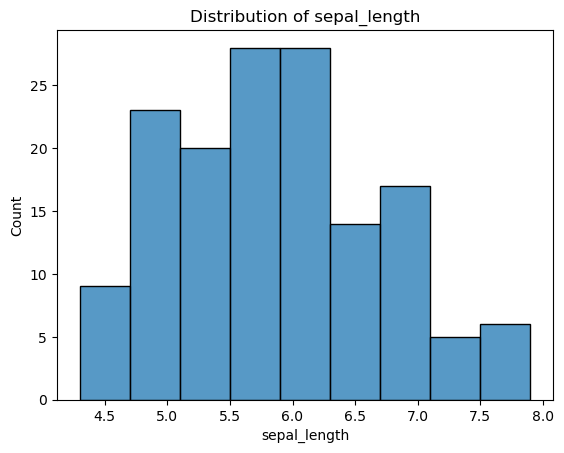

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


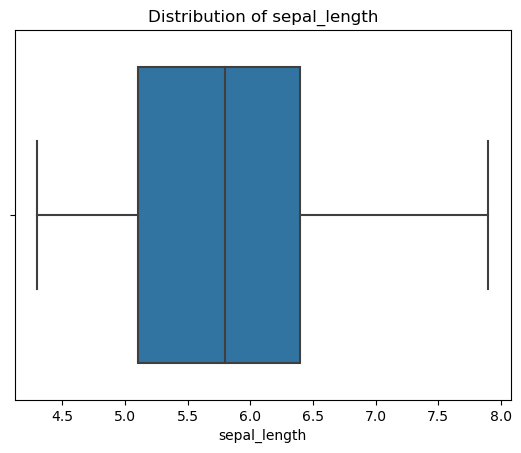

|       |   sepal_length |
|:------|---------------:|
| count |     150        |
| mean  |       5.84333  |
| std   |       0.828066 |
| min   |       4.3      |
| 25%   |       5.1      |
| 50%   |       5.8      |
| 75%   |       6.4      |
| max   |       7.9      |




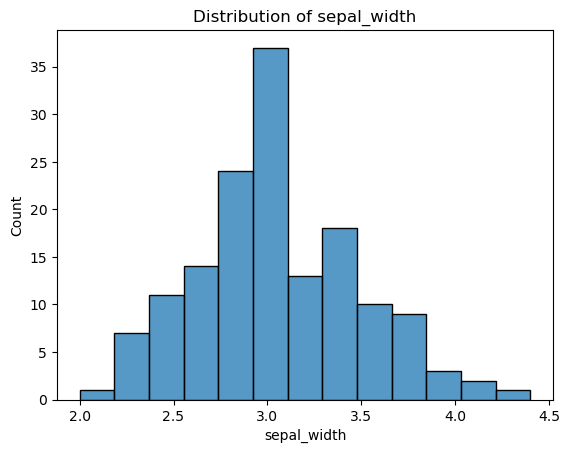

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


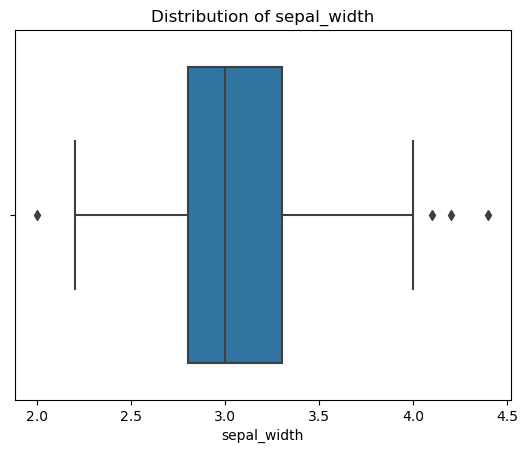

|       |   sepal_width |
|:------|--------------:|
| count |    150        |
| mean  |      3.05733  |
| std   |      0.435866 |
| min   |      2        |
| 25%   |      2.8      |
| 50%   |      3        |
| 75%   |      3.3      |
| max   |      4.4      |




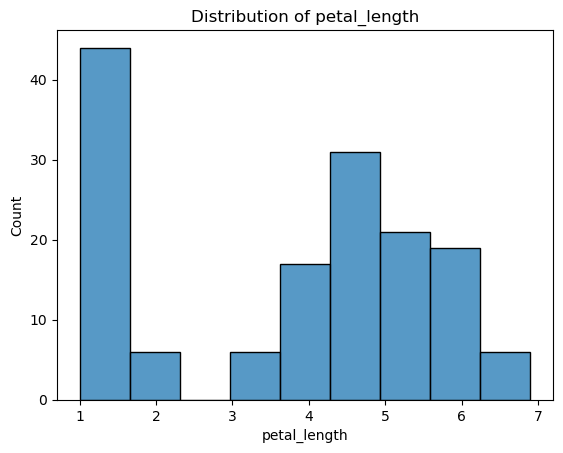

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


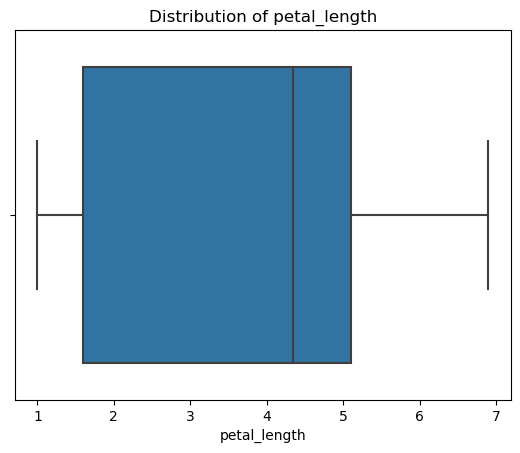

|       |   petal_length |
|:------|---------------:|
| count |       150      |
| mean  |         3.758  |
| std   |         1.7653 |
| min   |         1      |
| 25%   |         1.6    |
| 50%   |         4.35   |
| 75%   |         5.1    |
| max   |         6.9    |




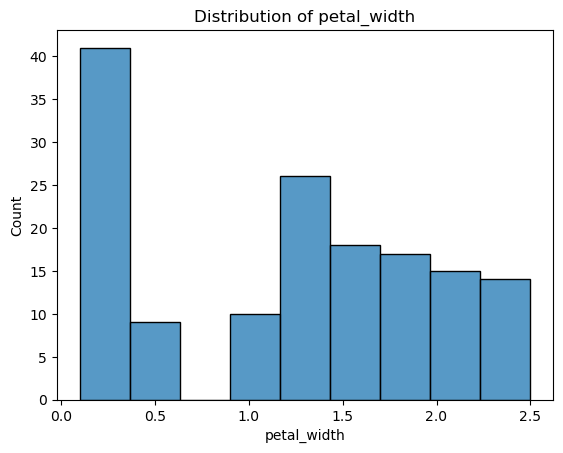

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


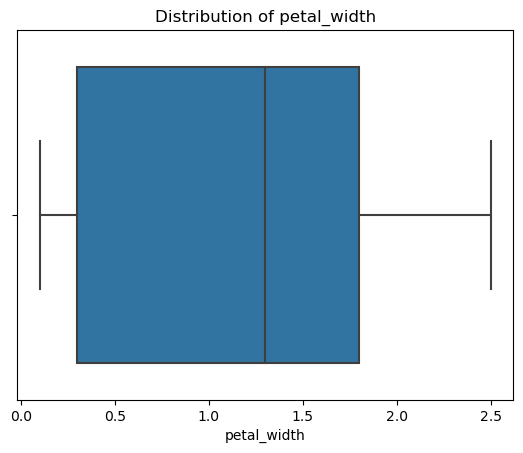

|       |   petal_width |
|:------|--------------:|
| count |    150        |
| mean  |      1.19933  |
| std   |      0.762238 |
| min   |      0.1      |
| 25%   |      0.3      |
| 50%   |      1.3      |
| 75%   |      1.8      |
| max   |      2.5      |




In [75]:
explore.quantitative(iris)

##### 2b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

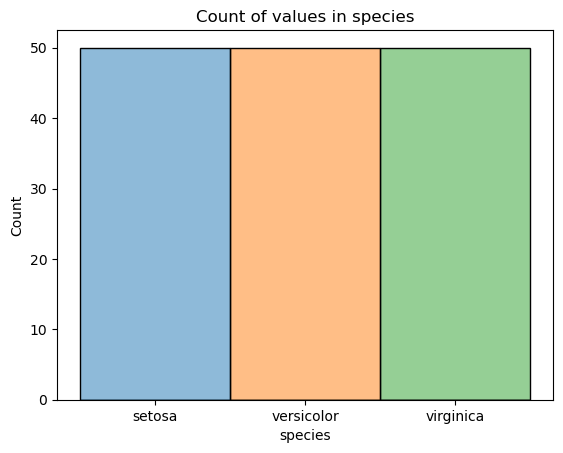

            Count  Percentage
setosa         50    0.333333
versicolor     50    0.333333
virginica      50    0.333333




In [76]:
explore.categorical(iris)

##### 2c. Document takeaways & any actions.

- Quantitative
    - sepal_length is normal
    - sepal_width is normal
    - petal_length has a break (Clustered?)
    - petal_width has a break (Clustered?)
- Categorical
    - species evenly distributed

### 3. Bivariate Stats

##### 3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

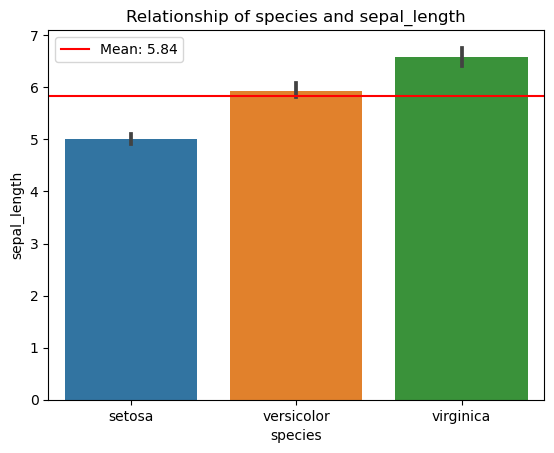

|       |   setosa |   versicolor |   virginica |
|:------|---------:|-------------:|------------:|
| count | 50       |    50        |    50       |
| mean  |  5.006   |     5.936    |     6.588   |
| std   |  0.35249 |     0.516171 |     0.63588 |
| min   |  4.3     |     4.9      |     4.9     |
| 25%   |  4.8     |     5.6      |     6.225   |
| 50%   |  5       |     5.9      |     6.5     |
| 75%   |  5.2     |     6.3      |     6.9     |
| max   |  5.8     |     7        |     7.9     |




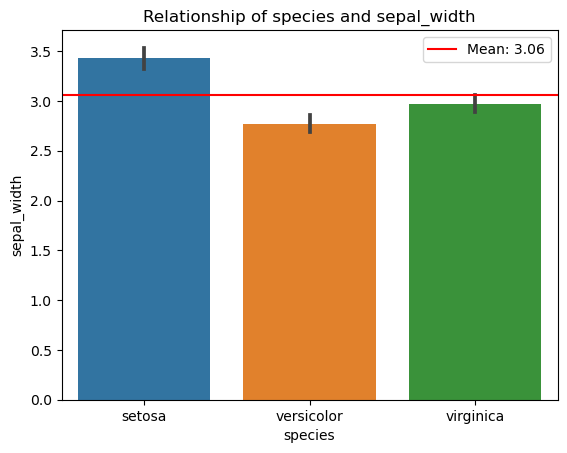

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |   50        |
| mean  |  3.428    |     2.77     |    2.974    |
| std   |  0.379064 |     0.313798 |    0.322497 |
| min   |  2.3      |     2        |    2.2      |
| 25%   |  3.2      |     2.525    |    2.8      |
| 50%   |  3.4      |     2.8      |    3        |
| 75%   |  3.675    |     3        |    3.175    |
| max   |  4.4      |     3.4      |    3.8      |




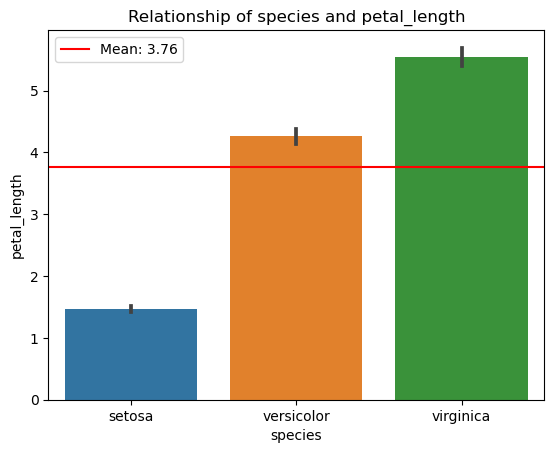

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |   50        |
| mean  |  1.462    |     4.26     |    5.552    |
| std   |  0.173664 |     0.469911 |    0.551895 |
| min   |  1        |     3        |    4.5      |
| 25%   |  1.4      |     4        |    5.1      |
| 50%   |  1.5      |     4.35     |    5.55     |
| 75%   |  1.575    |     4.6      |    5.875    |
| max   |  1.9      |     5.1      |    6.9      |




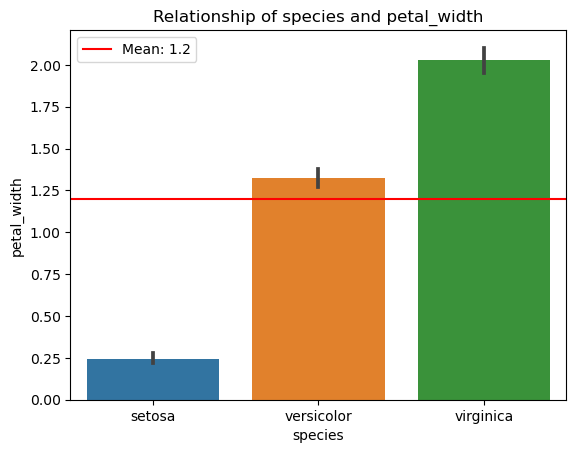

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |    50       |
| mean  |  0.246    |     1.326    |     2.026   |
| std   |  0.105386 |     0.197753 |     0.27465 |
| min   |  0.1      |     1        |     1.4     |
| 25%   |  0.2      |     1.2      |     1.8     |
| 50%   |  0.2      |     1.3      |     2       |
| 75%   |  0.3      |     1.5      |     2.3     |
| max   |  0.6      |     1.8      |     2.5     |




In [77]:
explore.cat_vs_val(iris)

##### 3b. For each measurement type, compute the descriptive statistics for each species.

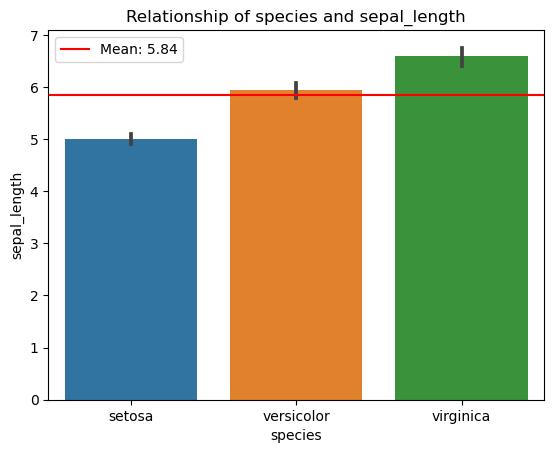

|       |   setosa |   versicolor |   virginica |
|:------|---------:|-------------:|------------:|
| count | 50       |    50        |    50       |
| mean  |  5.006   |     5.936    |     6.588   |
| std   |  0.35249 |     0.516171 |     0.63588 |
| min   |  4.3     |     4.9      |     4.9     |
| 25%   |  4.8     |     5.6      |     6.225   |
| 50%   |  5       |     5.9      |     6.5     |
| 75%   |  5.2     |     6.3      |     6.9     |
| max   |  5.8     |     7        |     7.9     |




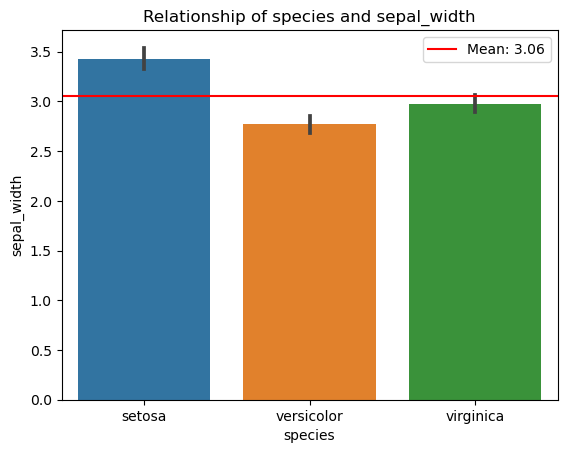

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |   50        |
| mean  |  3.428    |     2.77     |    2.974    |
| std   |  0.379064 |     0.313798 |    0.322497 |
| min   |  2.3      |     2        |    2.2      |
| 25%   |  3.2      |     2.525    |    2.8      |
| 50%   |  3.4      |     2.8      |    3        |
| 75%   |  3.675    |     3        |    3.175    |
| max   |  4.4      |     3.4      |    3.8      |




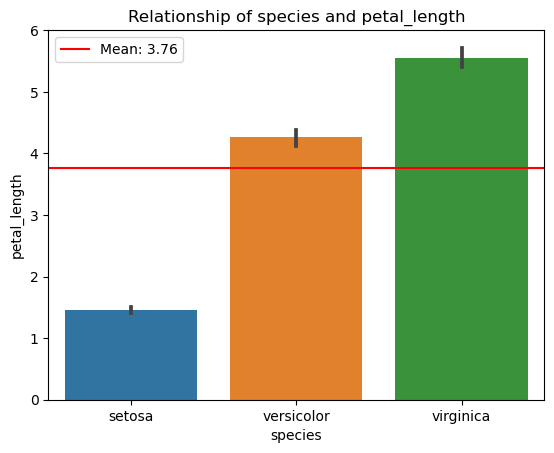

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |   50        |
| mean  |  1.462    |     4.26     |    5.552    |
| std   |  0.173664 |     0.469911 |    0.551895 |
| min   |  1        |     3        |    4.5      |
| 25%   |  1.4      |     4        |    5.1      |
| 50%   |  1.5      |     4.35     |    5.55     |
| 75%   |  1.575    |     4.6      |    5.875    |
| max   |  1.9      |     5.1      |    6.9      |




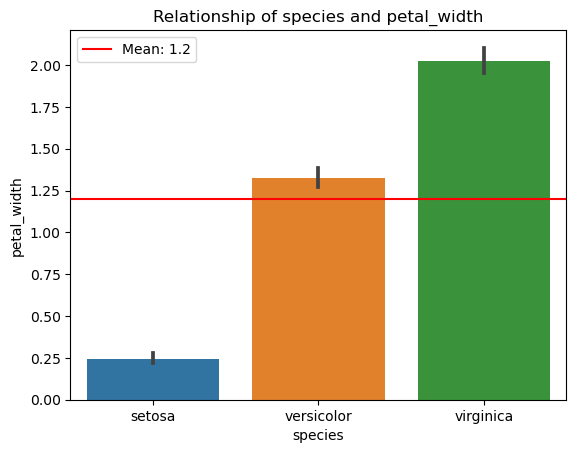

|       |    setosa |   versicolor |   virginica |
|:------|----------:|-------------:|------------:|
| count | 50        |    50        |    50       |
| mean  |  0.246    |     1.326    |     2.026   |
| std   |  0.105386 |     0.197753 |     0.27465 |
| min   |  0.1      |     1        |     1.4     |
| 25%   |  0.2      |     1.2      |     1.8     |
| 50%   |  0.2      |     1.3      |     2       |
| 75%   |  0.3      |     1.5      |     2.3     |
| max   |  0.6      |     1.8      |     2.5     |




In [78]:
explore.cat_vs_val(iris)

##### 3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [79]:
# species
explore.mannwhitneyu(iris)

What column do you want unique combinations of?
species
setosa and versicolor by sepal_length relationship:
Stat: 168.5
P-value: 8.34582714594069e-14

setosa and versicolor by sepal_width relationship:
Stat: 2312.0
P-value: 2.1433797280775203e-13

setosa and versicolor by petal_length relationship:
Stat: 0.0
P-value: 5.651011584290147e-18

setosa and versicolor by petal_width relationship:
Stat: 0.0
P-value: 2.2846694544023607e-18

setosa and virginica by sepal_length relationship:
Stat: 38.5
P-value: 6.396699069396538e-17

setosa and virginica by sepal_width relationship:
Stat: 2086.0
P-value: 7.099708901764312e-09

setosa and virginica by petal_length relationship:
Stat: 0.0
P-value: 5.665214485738232e-18

setosa and virginica by petal_width relationship:
Stat: 0.0
P-value: 2.4321931370649925e-18

versicolor and virginica by sepal_length relationship:
Stat: 526.0
P-value: 5.869006410664197e-07

versicolor and virginica by sepal_width relationship:
Stat: 841.0
P-value: 0.0045721422068

##### 3d. Document takeaways & any actions.

 - cat_vs_val
     - Each species when paired with any val_col and by their mean value seems to be unique (Clustering?)
 - species stats
     - Similar to above takeaway
 - mannwhitneyu(species vs. petal_width)
     - All p-values are less than 0.05
     - setosa & virginica by petal_width, petal_length stat value is 0
     - setosa & versicolor by petal_width, petal_length stat value is 0
     - Otherwise all stat values are greater than 0

### 4. Multivariate Stats

##### 4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [80]:
iris_valcol = pd.concat([iris.select_dtypes(include=['float', 'int']), iris.species], axis=1)

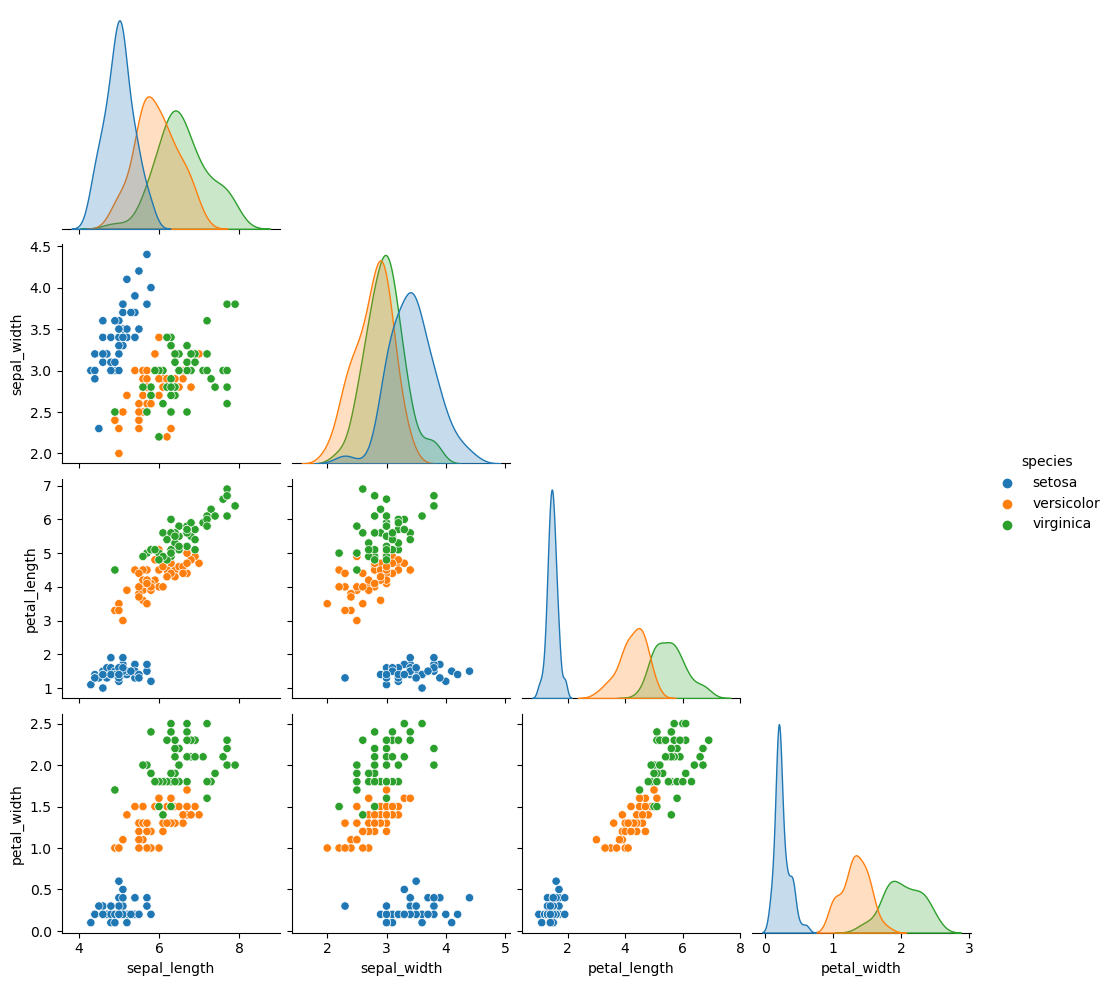

In [81]:
sns.pairplot(iris_valcol, corner=True, hue='species')
plt.show()

##### 4b. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

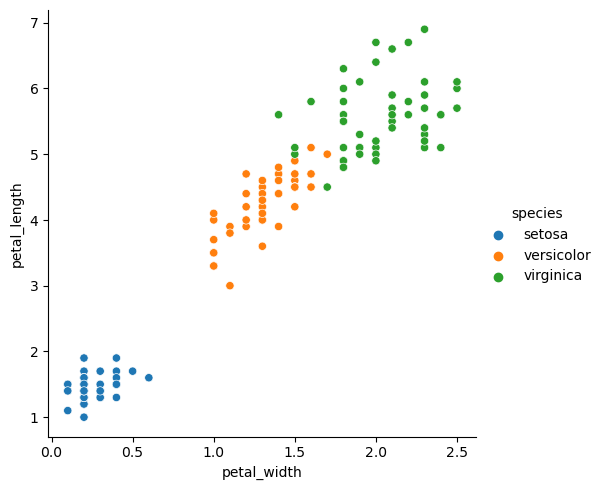

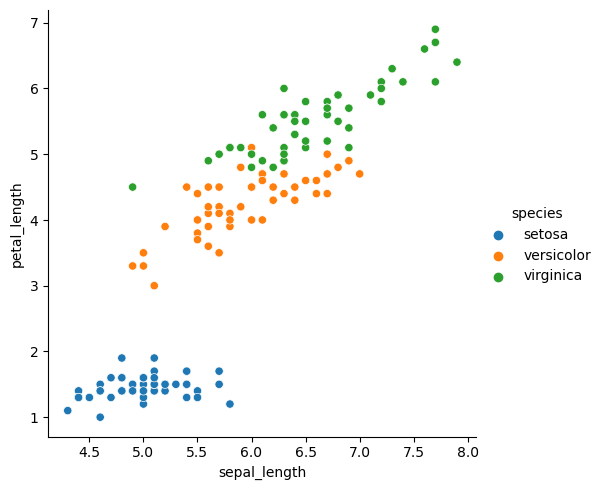

In [82]:
sns.relplot(data=iris_valcol, x='petal_width', y='petal_length', hue='species')
sns.relplot(data=iris_valcol, x='sepal_length', y='petal_length', hue='species')
plt.show()

##### 4c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Swarmplot of species and sepal_length Relationship


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


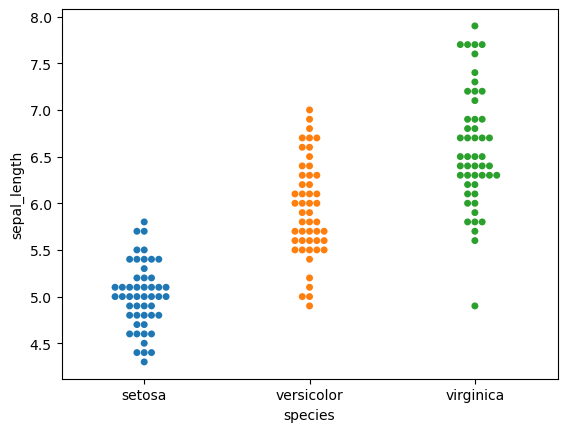

Swarmplot of species and sepal_width Relationship


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


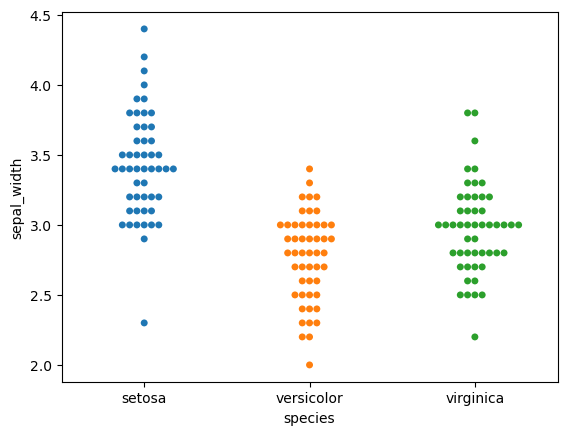

Swarmplot of species and petal_length Relationship


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


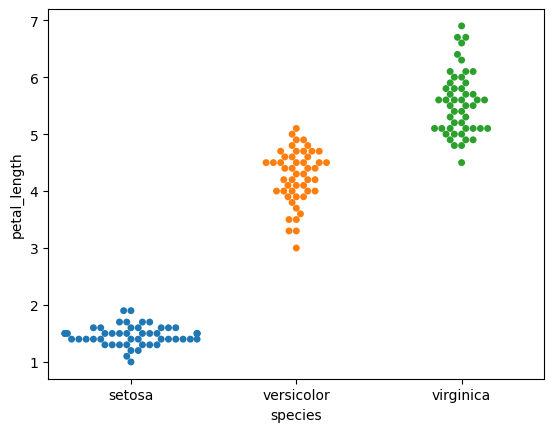

Swarmplot of species and petal_width Relationship


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


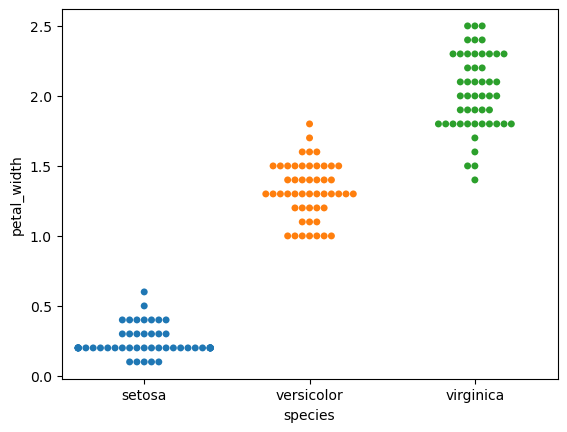

In [83]:
explore.swarms(iris)

Takeaway
- species paired with petal_length or petal_width seem to be very unique clusters for each species

##### 4d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

H$_0$ : Sepal area of virginica and setosa are not significantly different

H$_a$ : Sepal area of virginica and setosa are significantly different

In [84]:
iris['sepal_area'] = iris.sepal_length * iris.sepal_width

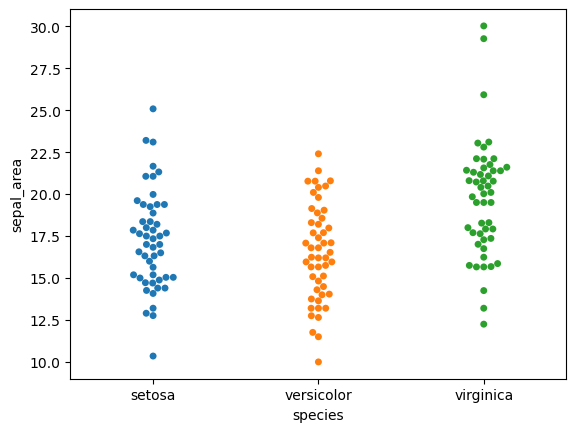

In [85]:
sns.swarmplot(data=iris, x='species', y='sepal_area')
plt.show()

In [86]:
stats.mannwhitneyu(iris[iris.species == 'virginica'].sepal_area, iris[iris.species == 'setosa'].sepal_area)

MannwhitneyuResult(statistic=1786.5, pvalue=0.00021958101613785087)

In [87]:
stats.ttest_ind(iris[iris.species == 'virginica'].sepal_area, iris[iris.species == 'setosa'].sepal_area)

Ttest_indResult(statistic=3.7835508965416054, pvalue=0.00026621177924123103)

##### 4e. Document takeaways and any actions.

Accept H$_a$

<a id="ExploratoryExercisesPartII"></a>
# Exploratory Exercises - Part II
<li><a href="#TableOfContents">Table of Contents</li></a>

### 1. Explore your titanic dataset more completely.

##### 1a. Determine drivers of the target variable

In [88]:
titanic = prepare.prep_titanic()
titanic.sample(5)

,survived,pclass,sex,age,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
321,0,3,male,27.0,7.8958,Southampton,1,0,1,0,0,1
7,0,3,male,2.0,21.0750,Southampton,0,0,1,0,0,1
841,0,2,male,16.0,10.5000,Southampton,1,0,1,0,0,1
84,1,2,female,17.0,10.5000,Southampton,1,1,0,0,0,1
339,0,1,male,45.0,35.5000,Southampton,1,0,1,0,0,1


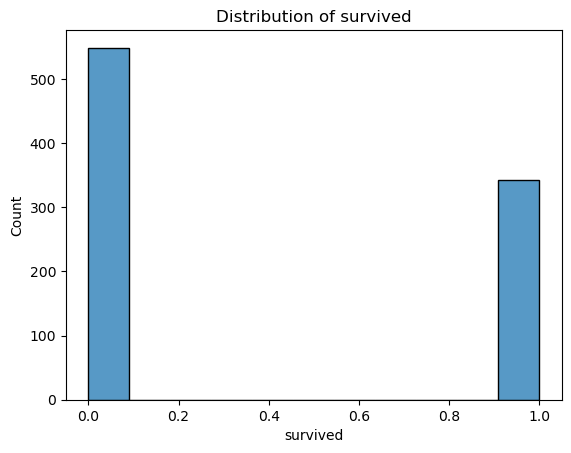

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


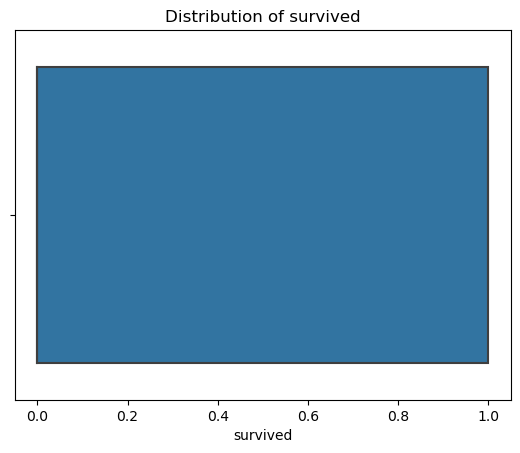

|       |   survived |
|:------|-----------:|
| count | 891        |
| mean  |   0.383838 |
| std   |   0.486592 |
| min   |   0        |
| 25%   |   0        |
| 50%   |   0        |
| 75%   |   1        |
| max   |   1        |




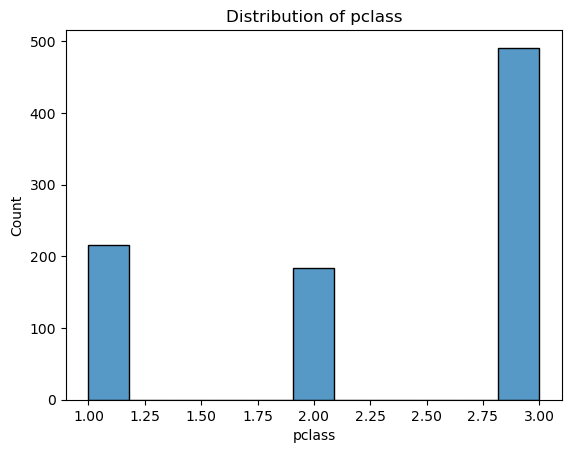

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


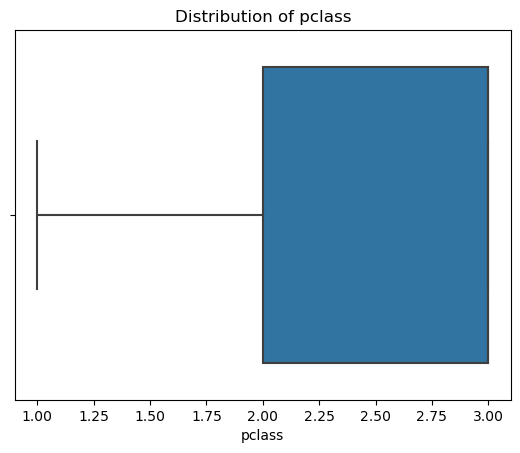

|       |     pclass |
|:------|-----------:|
| count | 891        |
| mean  |   2.30864  |
| std   |   0.836071 |
| min   |   1        |
| 25%   |   2        |
| 50%   |   3        |
| 75%   |   3        |
| max   |   3        |




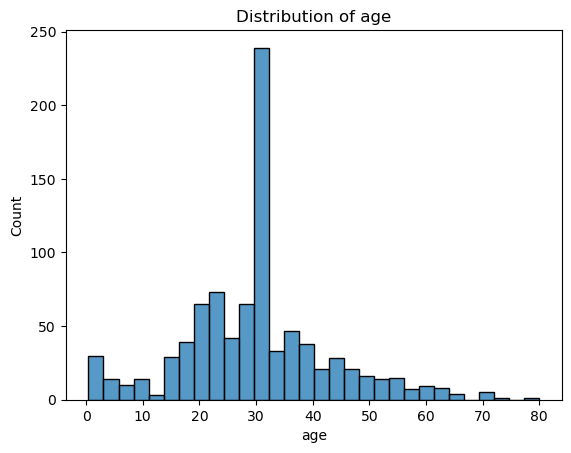

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


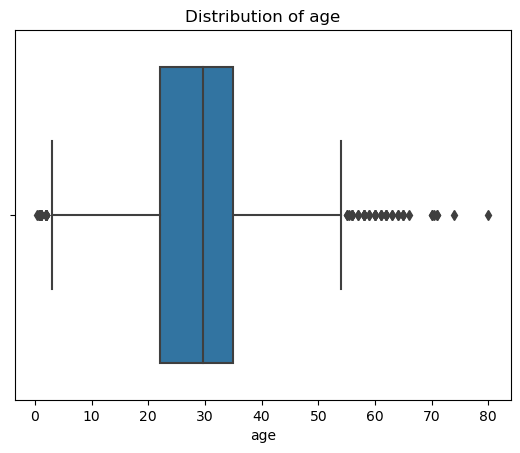

|       |      age |
|:------|---------:|
| count | 891      |
| mean  |  29.6991 |
| std   |  13.002  |
| min   |   0.42   |
| 25%   |  22      |
| 50%   |  29.6991 |
| 75%   |  35      |
| max   |  80      |




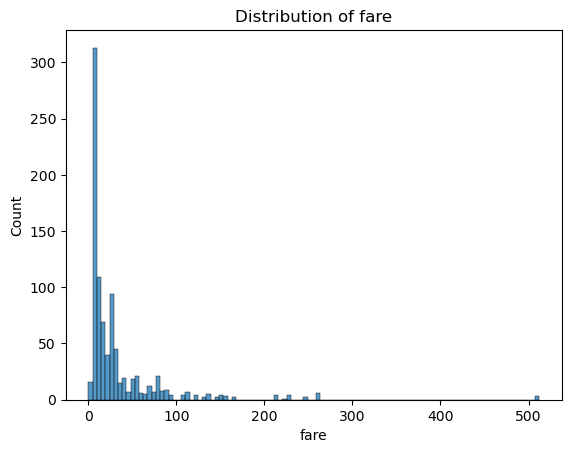

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


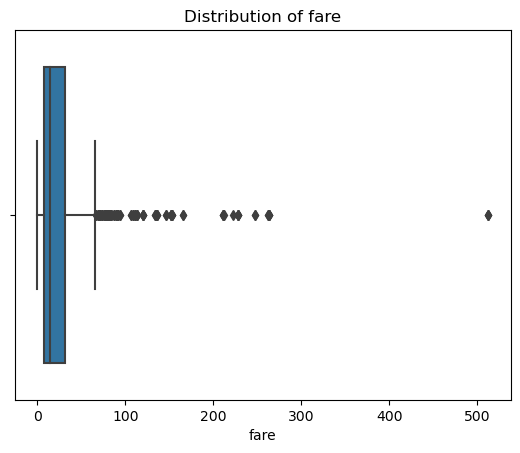

|       |     fare |
|:------|---------:|
| count | 891      |
| mean  |  32.2042 |
| std   |  49.6934 |
| min   |   0      |
| 25%   |   7.9104 |
| 50%   |  14.4542 |
| 75%   |  31      |
| max   | 512.329  |




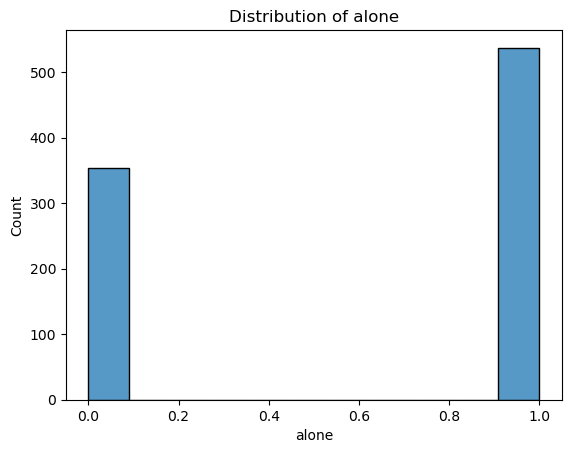

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


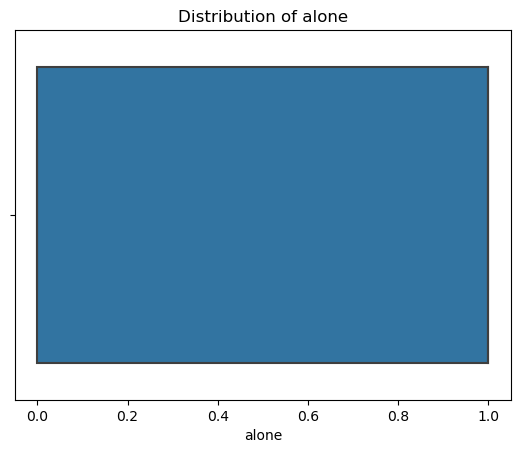

|       |      alone |
|:------|-----------:|
| count | 891        |
| mean  |   0.602694 |
| std   |   0.489615 |
| min   |   0        |
| 25%   |   0        |
| 50%   |   1        |
| 75%   |   1        |
| max   |   1        |




In [89]:
explore.quantitative(titanic)

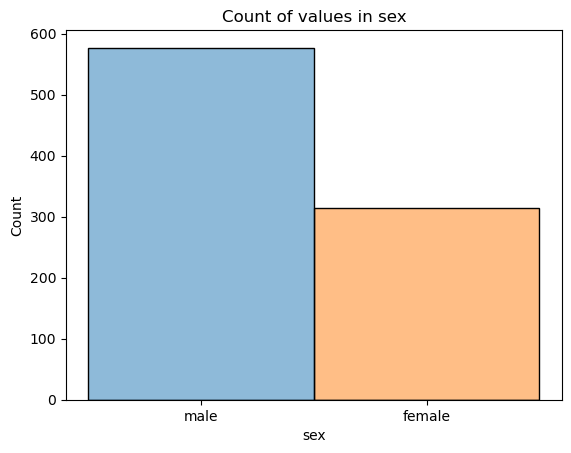

        Count  Percentage
male      577    0.647587
female    314    0.352413




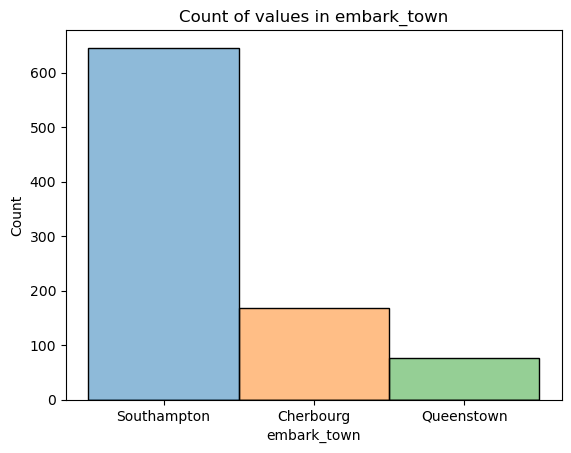

             Count  Percentage
Southampton    646    0.725028
Cherbourg      168    0.188552
Queenstown      77    0.086420




In [90]:
explore.categorical(titanic)

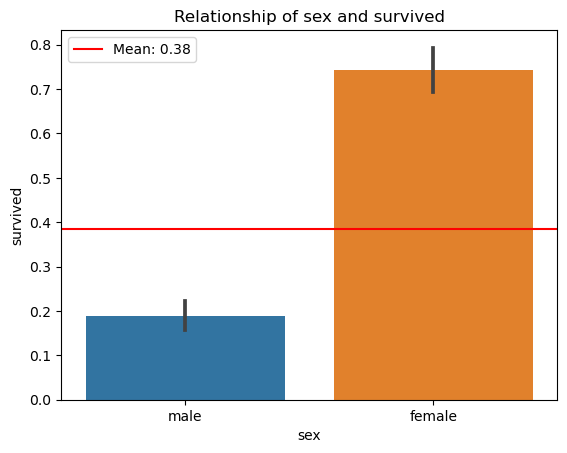

|       |     female |       male |
|:------|-----------:|-----------:|
| count | 314        | 577        |
| mean  |   0.742038 |   0.188908 |
| std   |   0.438211 |   0.391775 |
| min   |   0        |   0        |
| 25%   |   0        |   0        |
| 50%   |   1        |   0        |
| 75%   |   1        |   0        |
| max   |   1        |   1        |




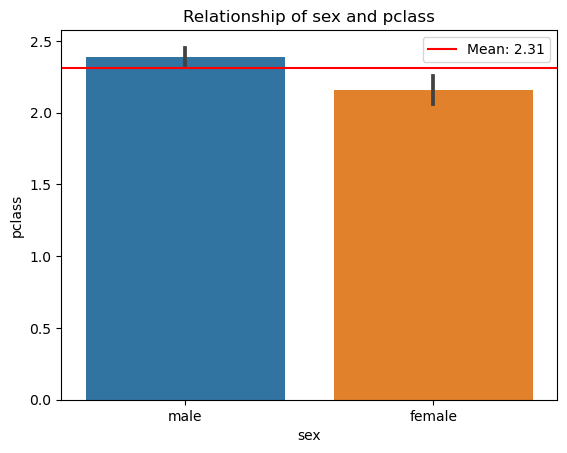

|       |    female |      male |
|:------|----------:|----------:|
| count | 314       | 577       |
| mean  |   2.15924 |   2.38995 |
| std   |   0.85729 |   0.81358 |
| min   |   1       |   1       |
| 25%   |   1       |   2       |
| 50%   |   2       |   3       |
| 75%   |   3       |   3       |
| max   |   3       |   3       |




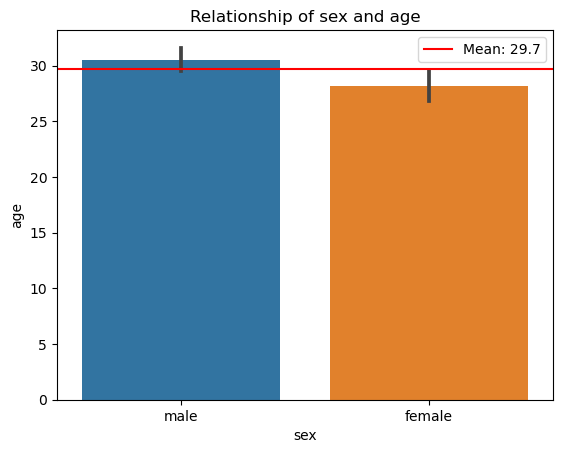

|       |   female |     male |
|:------|---------:|---------:|
| count | 314      | 577      |
| mean  |  28.2167 |  30.5058 |
| std   |  12.8775 |  13.0095 |
| min   |   0.75   |   0.42   |
| 25%   |  21      |  23      |
| 50%   |  29.6991 |  29.6991 |
| 75%   |  35      |  35      |
| max   |  63      |  80      |




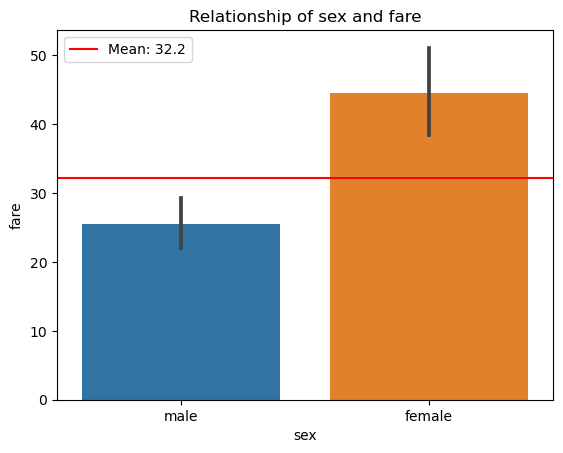

|       |   female |     male |
|:------|---------:|---------:|
| count | 314      | 577      |
| mean  |  44.4798 |  25.5239 |
| std   |  57.9977 |  43.1383 |
| min   |   6.75   |   0      |
| 25%   |  12.0719 |   7.8958 |
| 50%   |  23      |  10.5    |
| 75%   |  55      |  26.55   |
| max   | 512.329  | 512.329  |




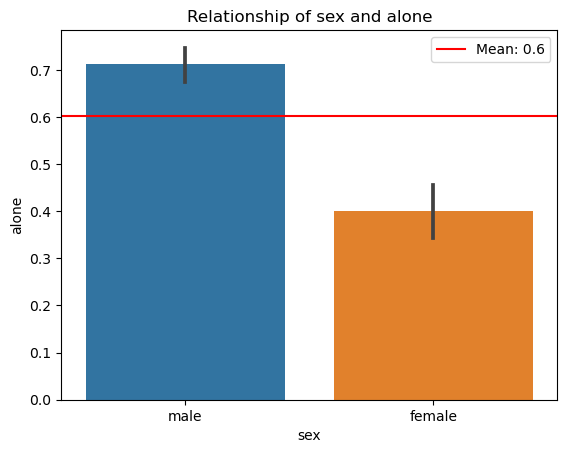

|       |     female |       male |
|:------|-----------:|-----------:|
| count | 314        | 577        |
| mean  |   0.401274 |   0.712305 |
| std   |   0.490939 |   0.453081 |
| min   |   0        |   0        |
| 25%   |   0        |   0        |
| 50%   |   0        |   1        |
| 75%   |   1        |   1        |
| max   |   1        |   1        |




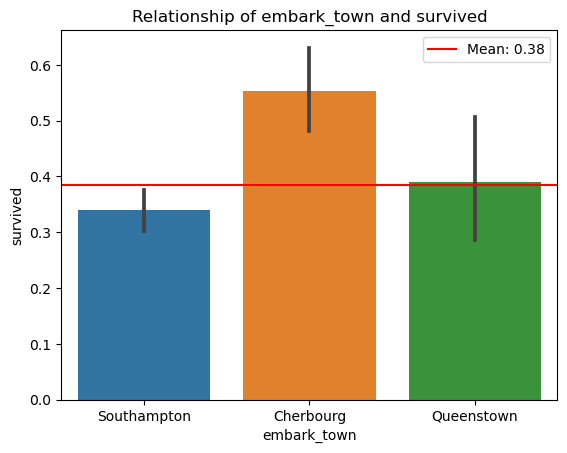

|       |   Cherbourg |   Queenstown |   Southampton |
|:------|------------:|-------------:|--------------:|
| count |  168        |     77       |    646        |
| mean  |    0.553571 |      0.38961 |      0.339009 |
| std   |    0.498608 |      0.49086 |      0.47374  |
| min   |    0        |      0       |      0        |
| 25%   |    0        |      0       |      0        |
| 50%   |    1        |      0       |      0        |
| 75%   |    1        |      1       |      1        |
| max   |    1        |      1       |      1        |




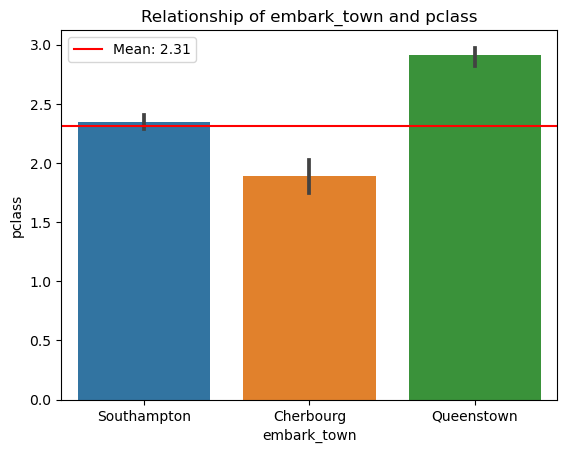

|       |   Cherbourg |   Queenstown |   Southampton |
|:------|------------:|-------------:|--------------:|
| count |    168      |    77        |    646        |
| mean  |      1.8869 |     2.90909  |      2.34675  |
| std   |      0.9441 |     0.369274 |      0.791748 |
| min   |      1      |     1        |      1        |
| 25%   |      1      |     3        |      2        |
| 50%   |      1      |     3        |      3        |
| 75%   |      3      |     3        |      3        |
| max   |      3      |     3        |      3        |




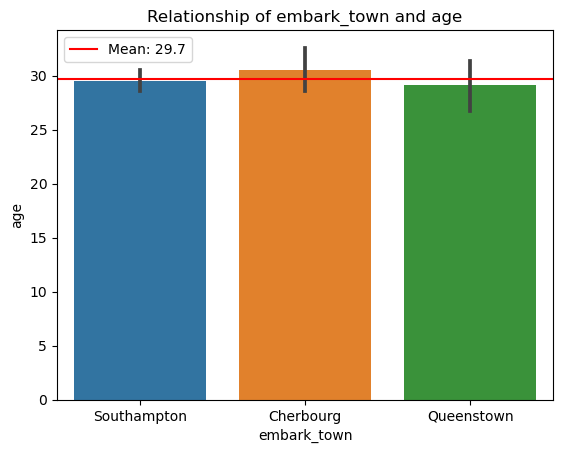

|       |   Cherbourg |   Queenstown |   Southampton |
|:------|------------:|-------------:|--------------:|
| count |    168      |      77      |      646      |
| mean  |     30.5624 |      29.1137 |       29.5444 |
| std   |     13.5737 |      10.1123 |       13.1626 |
| min   |      0.42   |       2      |        0.67   |
| 25%   |     23.375  |      29.6991 |       22      |
| 50%   |     29.6991 |      29.6991 |       29.6991 |
| 75%   |     36      |      29.6991 |       36      |
| max   |     71      |      70.5    |       80      |




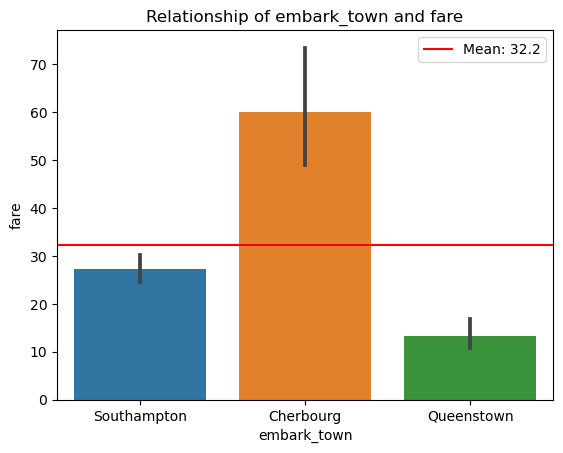

|       |   Cherbourg |   Queenstown |   Southampton |
|:------|------------:|-------------:|--------------:|
| count |    168      |       77     |      646      |
| mean  |     59.9541 |       13.276 |       27.2437 |
| std   |     83.913  |       14.188 |       35.9529 |
| min   |      4.0125 |        6.75  |        0      |
| 25%   |     13.698  |        7.75  |        8.05   |
| 50%   |     29.7    |        7.75  |       13      |
| 75%   |     78.5    |       15.5   |       27.9    |
| max   |    512.329  |       90     |      263      |




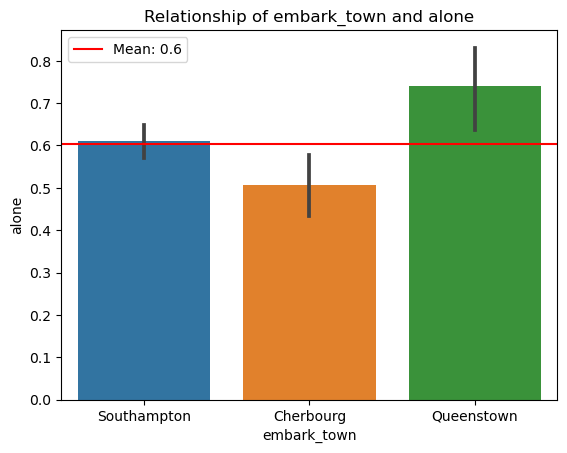

|       |   Cherbourg |   Queenstown |   Southampton |
|:------|------------:|-------------:|--------------:|
| count |  168        |    77        |    646        |
| mean  |    0.505952 |     0.74026  |      0.611455 |
| std   |    0.501459 |     0.441367 |      0.487797 |
| min   |    0        |     0        |      0        |
| 25%   |    0        |     0        |      0        |
| 50%   |    1        |     1        |      1        |
| 75%   |    1        |     1        |      1        |
| max   |    1        |     1        |      1        |




In [91]:
explore.cat_vs_val(titanic)

 - Values:
     - Majority pclass 3
     - Majority age 25 - 35
     - Majority fare around 35
     - More alone than not alone
 - Categorical: 
     - More males
     - Mostly from Southampton
 - Cat vs. Val:
     - Females survived more
     - Cherbourg seemed to have more survive
     - Cherbourg paid a much higher fare
     - Cherbourg was a higher pclass avg
     - Cherbourg was less alone

In [92]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

##### 1b. Determine if certain columns should be dropped

Completed

##### 1c. Determine if it would be valuable to bin some numeric columns

Completed

##### 1d. Determine if it would be valuable to combine multiple columns into one.

Completed

### 2. Does it make sense to combine any features?

As of right now, no...  It would appear that the data is filtered and represented properly for exploration purposes currently; however, that may change as other questions arise.

### 3. Do you find any surprises?

I didn't think about it at first, but from first glance the 'Cherbourg' seemed to be where generally all of your 'higher-class' people were which also happened to have the highest survival rate and least amount of being alone.  I'd look into it more, but as of right now, Cherbourg seemed to be the richer, couples/families, that MIGHT have an effect to why they survived at a much higher rate than the other two.

### 4. Document any and all findings and takeaways in your notebook using markdown.

 - Values:
     - Majority pclass 3
     - Majority age 25 - 35
     - Majority fare around 35
     - More alone than not alone
 - Categorical: 
     - More males
     - Mostly from Southampton
 - Cat vs. Val:
     - Females survived more
     - Cherbourg seemed to have more survive
     - Cherbourg paid a much higher fare
     - Cherbourg was a higher pclass avg
     - Cherbourg was less alone

<a id="ExploratoryExercisesPartIII"></a>
# Exploratory Exercises - Part III
<li><a href="#TableOfContents">Table of Contents</li></a>

### 1. Explore telco

##### 1a. Explore your telco data to discover drivers of churn

In [93]:
telco = prepare.prep_telco()
telco = telco.drop(columns='customer_id')
telco.sample(5)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
6353,Female,0,No,Yes,13,Yes,No,Yes,Yes,No,...,1,0,0,0,0,1,0,1,0,0
1395,Female,0,No,No,29,Yes,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
6354,Male,0,No,No,7,Yes,No,No,No,No,...,0,1,0,1,0,0,0,1,0,0
6190,Male,1,Yes,No,69,Yes,Yes,No,Yes,Yes,...,0,1,0,1,0,0,0,1,0,0
5673,Female,0,Yes,Yes,13,Yes,Yes,No internet service,No internet service,No internet service,...,0,0,1,1,0,0,0,0,0,1


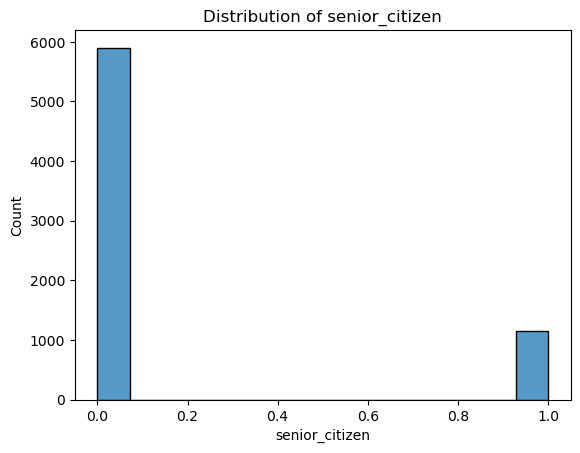

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


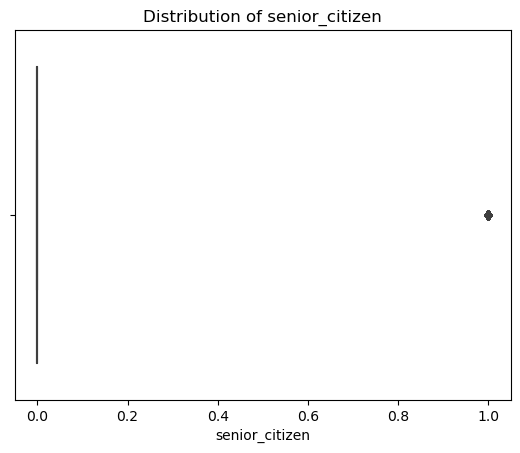

|       |   senior_citizen |
|:------|-----------------:|
| count |      7043        |
| mean  |         0.162147 |
| std   |         0.368612 |
| min   |         0        |
| 25%   |         0        |
| 50%   |         0        |
| 75%   |         0        |
| max   |         1        |




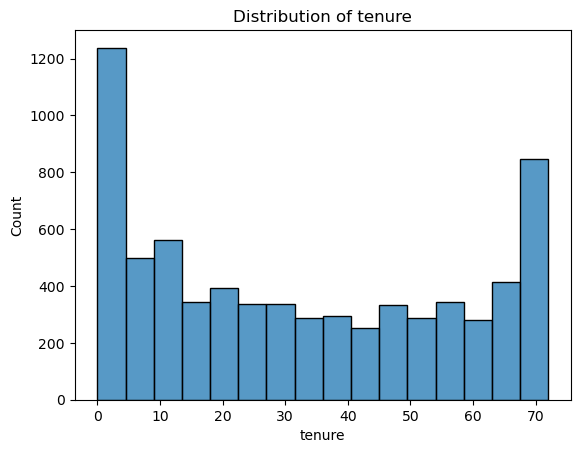

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


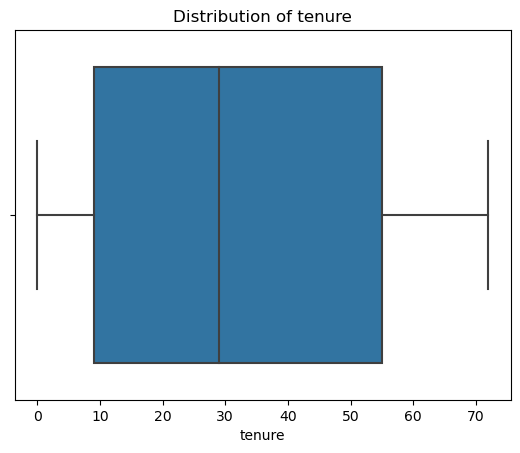

|       |    tenure |
|:------|----------:|
| count | 7043      |
| mean  |   32.3711 |
| std   |   24.5595 |
| min   |    0      |
| 25%   |    9      |
| 50%   |   29      |
| 75%   |   55      |
| max   |   72      |




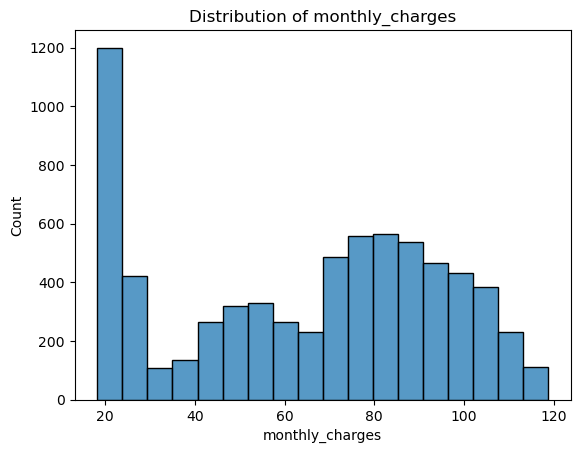

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


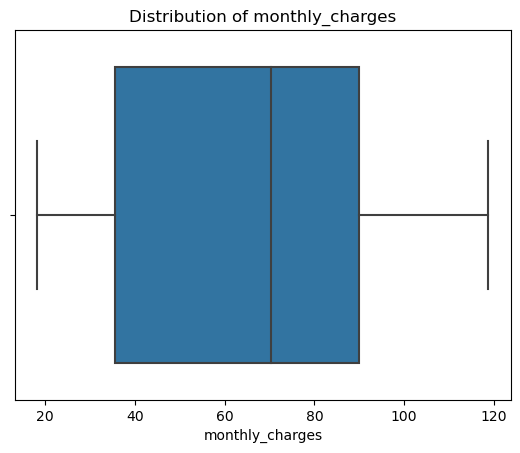

|       |   monthly_charges |
|:------|------------------:|
| count |         7043      |
| mean  |           64.7617 |
| std   |           30.09   |
| min   |           18.25   |
| 25%   |           35.5    |
| 50%   |           70.35   |
| 75%   |           89.85   |
| max   |          118.75   |




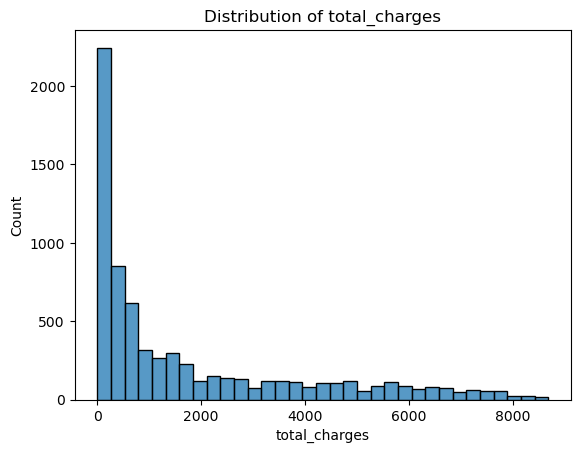

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


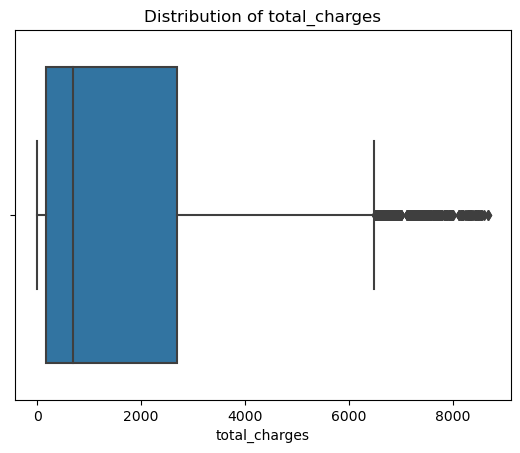

|       |   total_charges |
|:------|----------------:|
| count |         7043    |
| mean  |         1761.41 |
| std   |         2164.69 |
| min   |            0    |
| 25%   |          165.1  |
| 50%   |          686.95 |
| 75%   |         2696.98 |
| max   |         8684.8  |




In [94]:
explore.quantitative(telco)

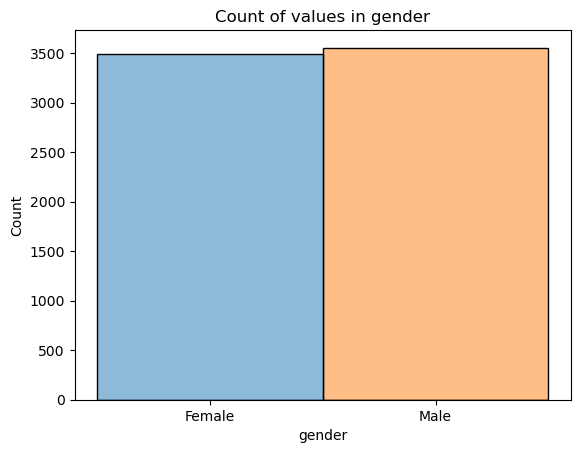

        Count  Percentage
Male     3555    0.504756
Female   3488    0.495244




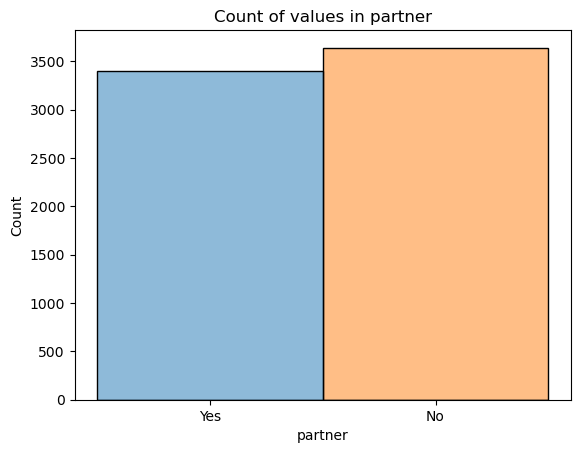

     Count  Percentage
No    3641    0.516967
Yes   3402    0.483033




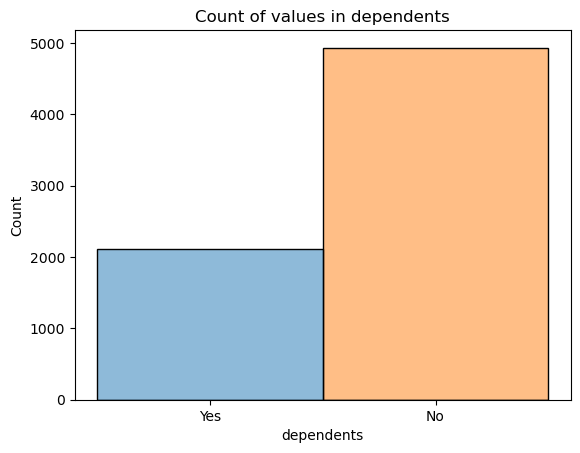

     Count  Percentage
No    4933    0.700412
Yes   2110    0.299588




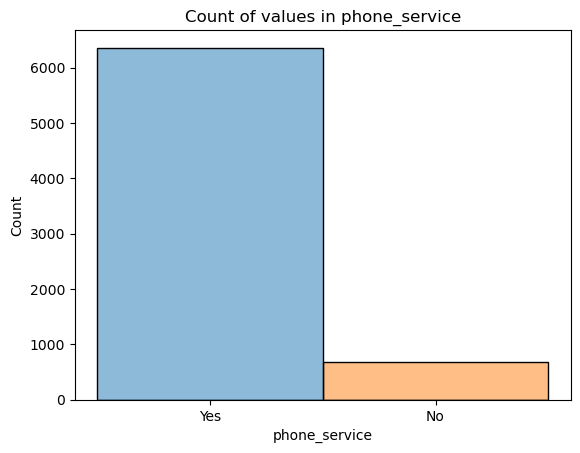

     Count  Percentage
Yes   6361    0.903166
No     682    0.096834




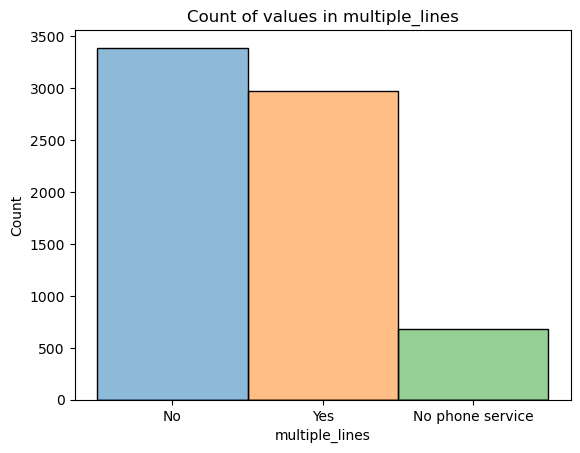

                  Count  Percentage
No                 3390    0.481329
Yes                2971    0.421837
No phone service    682    0.096834




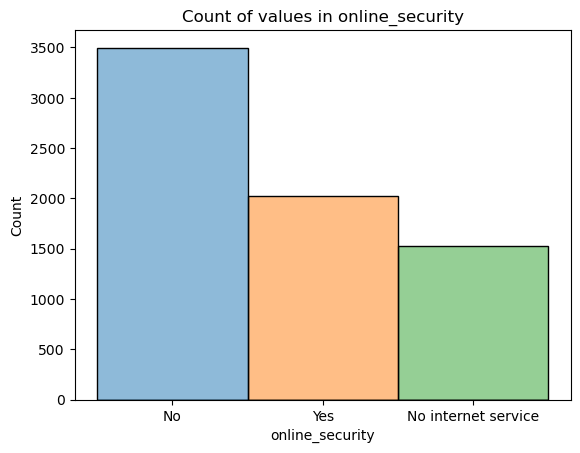

                     Count  Percentage
No                    3498    0.496663
Yes                   2019    0.286668
No internet service   1526    0.216669




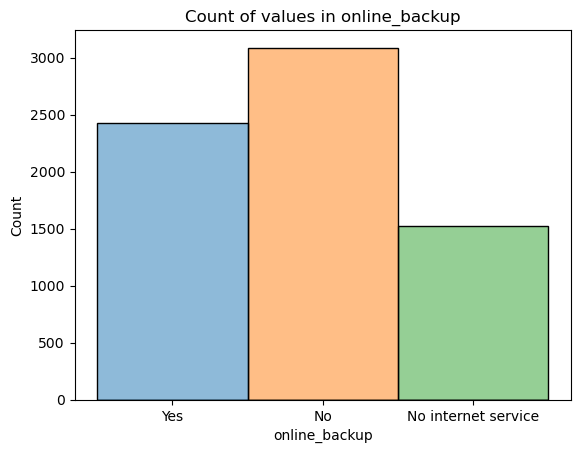

                     Count  Percentage
No                    3088    0.438450
Yes                   2429    0.344881
No internet service   1526    0.216669




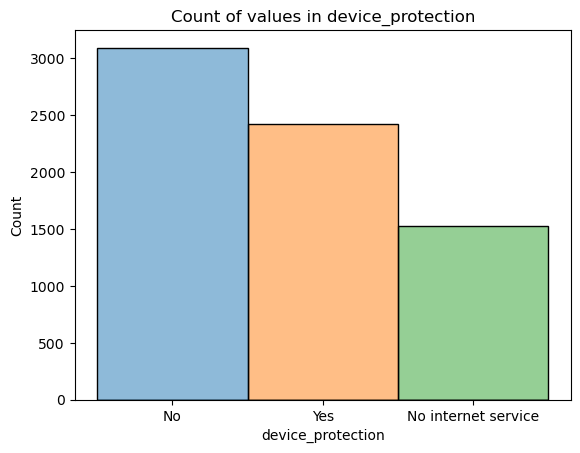

                     Count  Percentage
No                    3095    0.439443
Yes                   2422    0.343888
No internet service   1526    0.216669




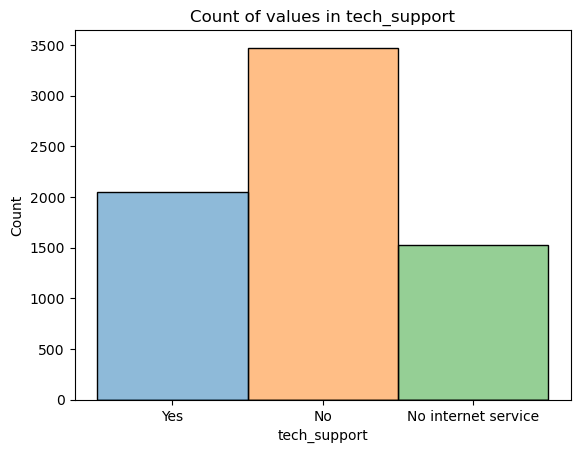

                     Count  Percentage
No                    3473    0.493114
Yes                   2044    0.290217
No internet service   1526    0.216669




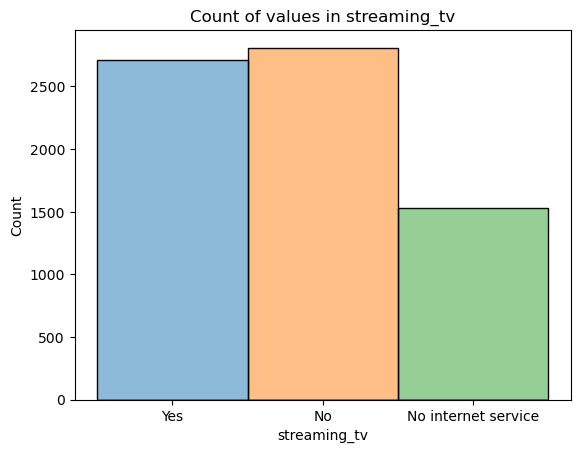

                     Count  Percentage
No                    2810    0.398978
Yes                   2707    0.384353
No internet service   1526    0.216669




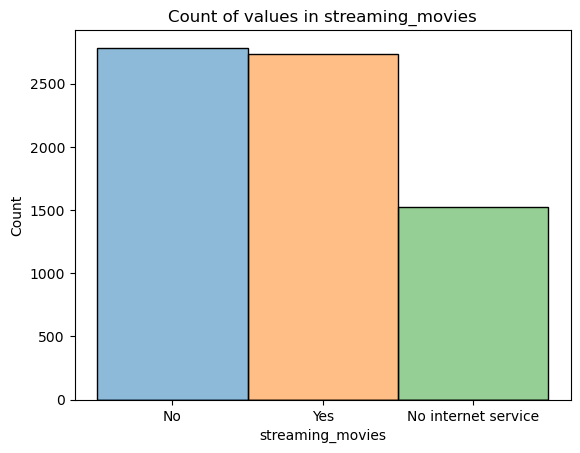

                     Count  Percentage
No                    2785    0.395428
Yes                   2732    0.387903
No internet service   1526    0.216669




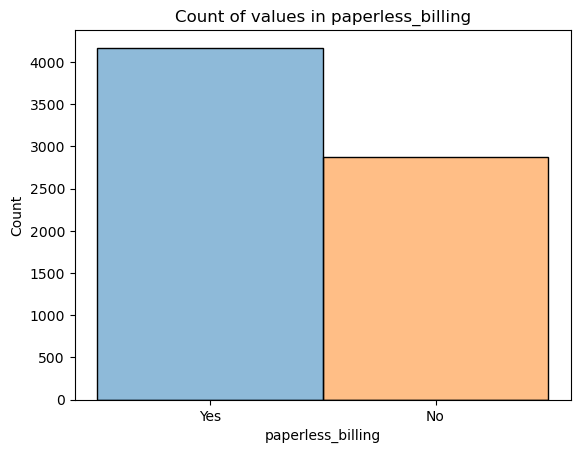

     Count  Percentage
Yes   4171    0.592219
No    2872    0.407781




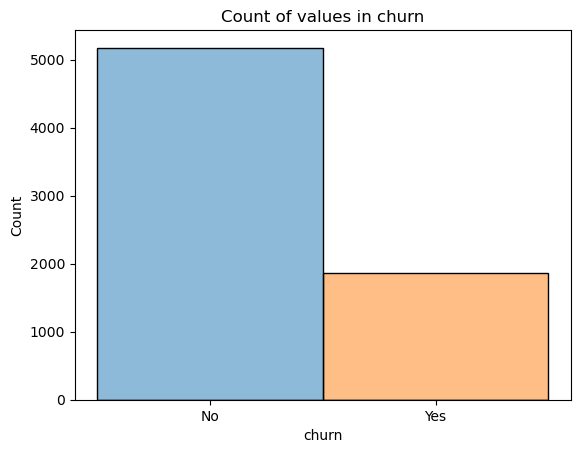

     Count  Percentage
No    5174     0.73463
Yes   1869     0.26537




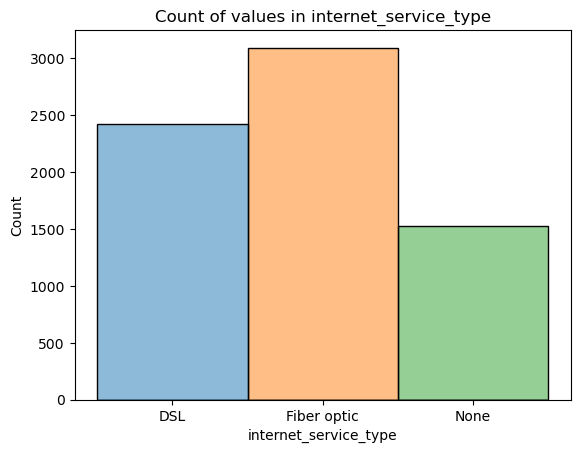

             Count  Percentage
Fiber optic   3096    0.439585
DSL           2421    0.343746
None          1526    0.216669




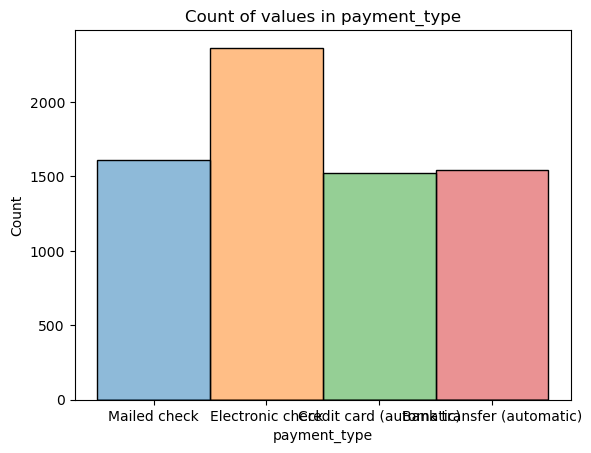

                           Count  Percentage
Electronic check            2365    0.335794
Mailed check                1612    0.228880
Bank transfer (automatic)   1544    0.219225
Credit card (automatic)     1522    0.216101




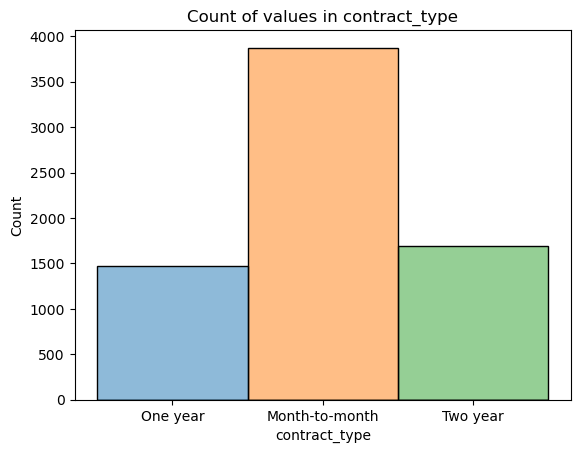

                Count  Percentage
Month-to-month   3875    0.550192
Two year         1695    0.240664
One year         1473    0.209144




In [95]:
explore.categorical(telco)

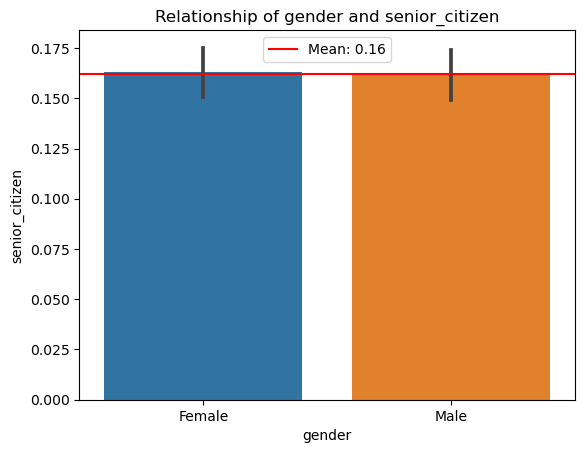

|       |      Female |        Male |
|:------|------------:|------------:|
| count | 3488        | 3555        |
| mean  |    0.162844 |    0.161463 |
| std   |    0.369276 |    0.368009 |
| min   |    0        |    0        |
| 25%   |    0        |    0        |
| 50%   |    0        |    0        |
| 75%   |    0        |    0        |
| max   |    1        |    1        |




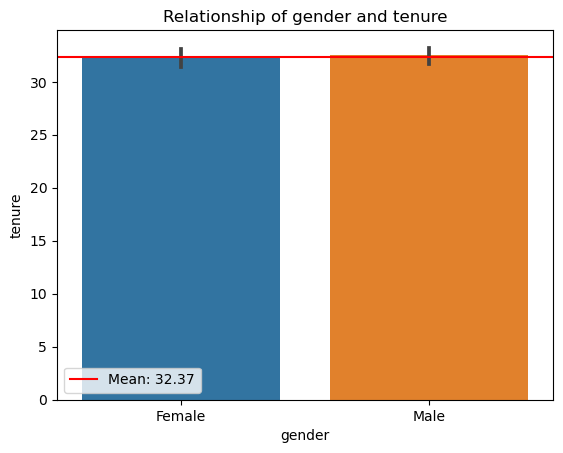

|       |    Female |      Male |
|:------|----------:|----------:|
| count | 3488      | 3555      |
| mean  |   32.2446 |   32.4954 |
| std   |   24.4632 |   24.6564 |
| min   |    0      |    0      |
| 25%   |    9      |    9      |
| 50%   |   29      |   29      |
| 75%   |   55      |   56      |
| max   |   72      |   72      |




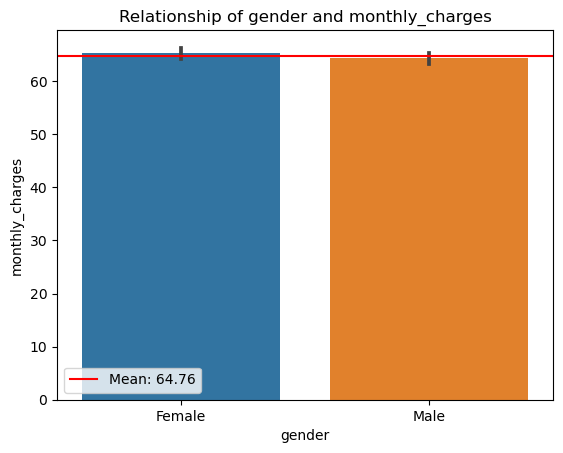

|       |    Female |      Male |
|:------|----------:|----------:|
| count | 3488      | 3555      |
| mean  |   65.2042 |   64.3275 |
| std   |   30.0613 |   30.1161 |
| min   |   18.4    |   18.25   |
| 25%   |   35.9    |   35.225  |
| 50%   |   70.65   |   70.1    |
| 75%   |   89.85   |   89.875  |
| max   |  118.75   |  118.35   |




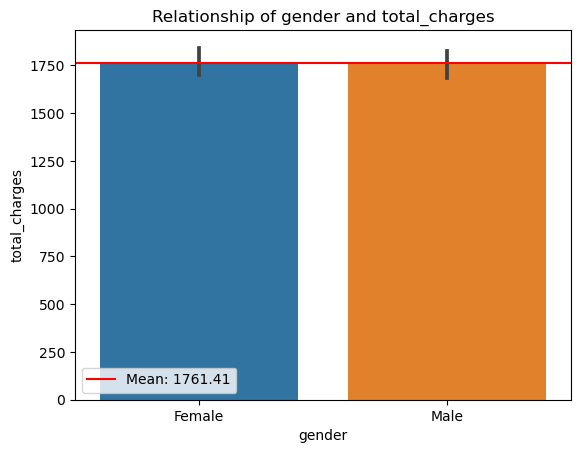

|       |   Female |     Male |
|:------|---------:|---------:|
| count | 3488     | 3555     |
| mean  | 1767.92  | 1755.02  |
| std   | 2182.06  | 2147.8   |
| min   |    0     |    0     |
| 25%   |  162.188 |  169.175 |
| 50%   |  674.825 |  695.85  |
| 75%   | 2727.43  | 2665.53  |
| max   | 8672.45  | 8684.8   |




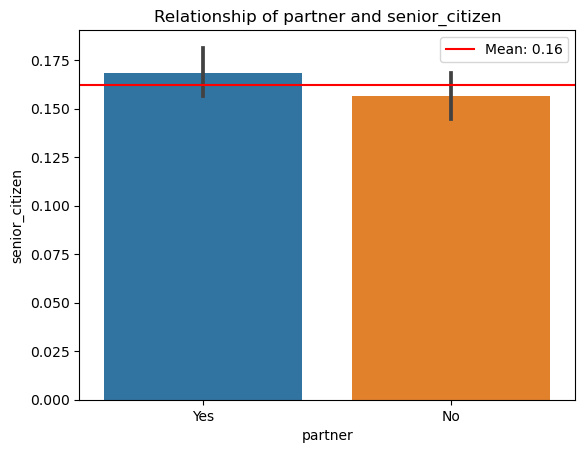

|       |          No |         Yes |
|:------|------------:|------------:|
| count | 3641        | 3402        |
| mean  |    0.156276 |    0.16843  |
| std   |    0.363166 |    0.374303 |
| min   |    0        |    0        |
| 25%   |    0        |    0        |
| 50%   |    0        |    0        |
| 75%   |    0        |    0        |
| max   |    1        |    1        |




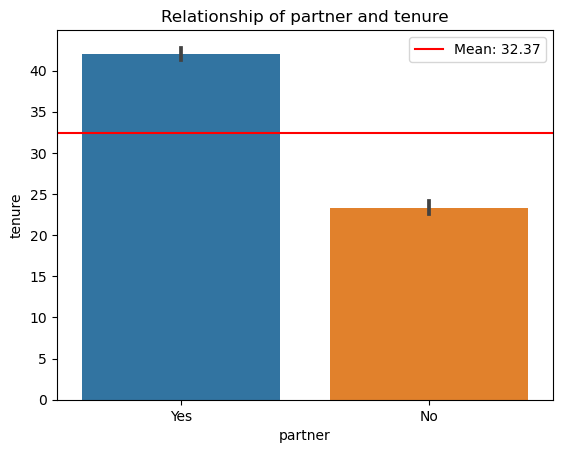

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 3641      | 3402      |
| mean  |   23.3579 |   42.0176 |
| std   |   21.7695 |   23.6987 |
| min   |    0      |    0      |
| 25%   |    4      |   21      |
| 50%   |   16      |   46      |
| 75%   |   39      |   65      |
| max   |   72      |   72      |




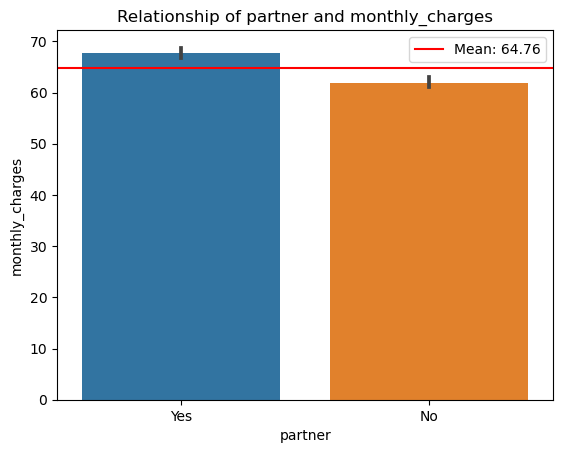

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 3641      | 3402      |
| mean  |   61.945  |   67.7763 |
| std   |   29.0601 |   30.8755 |
| min   |   18.25   |   18.4    |
| 25%   |   34.05   |   39.3625 |
| 50%   |   68.65   |   74.8    |
| 75%   |   85.4    |   94.05   |
| max   |  118.65   |  118.75   |




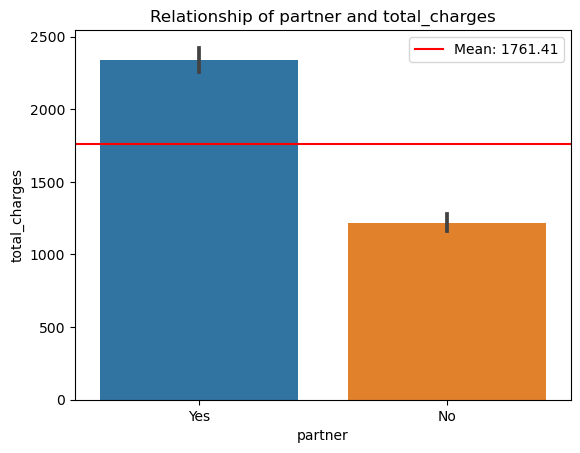

|       |      No |     Yes |
|:------|--------:|--------:|
| count | 3641    | 3402    |
| mean  | 1219.16 | 2341.75 |
| std   | 1741.55 | 2409.28 |
| min   |    0    |    0    |
| 25%   |   85.7  |  355.2  |
| 50%   |  414.1  | 1331.95 |
| 75%   | 1564.5  | 4161.74 |
| max   | 8547.15 | 8684.8  |




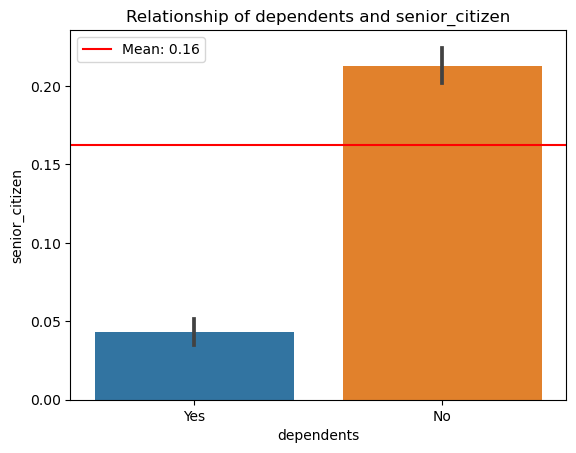

|       |          No |         Yes |
|:------|------------:|------------:|
| count | 4933        | 2110        |
| mean  |    0.213055 |    0.043128 |
| std   |    0.409508 |    0.203193 |
| min   |    0        |    0        |
| 25%   |    0        |    0        |
| 50%   |    0        |    0        |
| 75%   |    0        |    0        |
| max   |    1        |    1        |




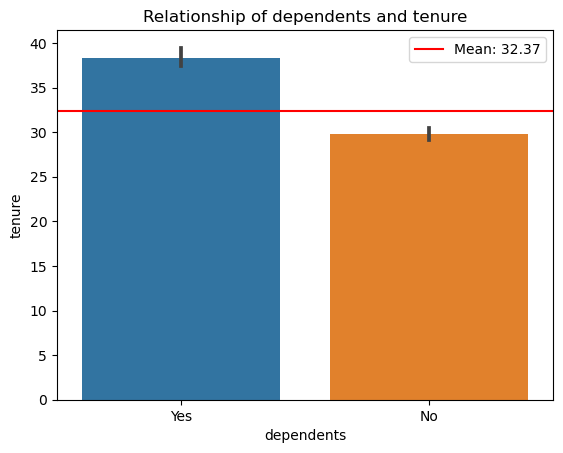

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 4933      | 2110      |
| mean  |   29.806  |   38.3682 |
| std   |   24.2599 |   24.2133 |
| min   |    1      |    0      |
| 25%   |    7      |   16      |
| 50%   |   25      |   39      |
| 75%   |   52      |   62      |
| max   |   72      |   72      |




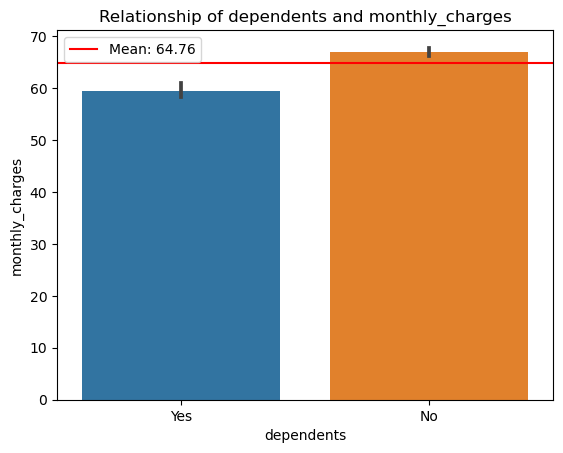

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 4933      | 2110      |
| mean  |   67.0028 |   59.5222 |
| std   |   29.2748 |   31.3017 |
| min   |   18.25   |   18.7    |
| 25%   |   44.85   |   24.5    |
| 50%   |   73.9    |   60.975  |
| 75%   |   90.65   |   85.95   |
| max   |  118.65   |  118.75   |




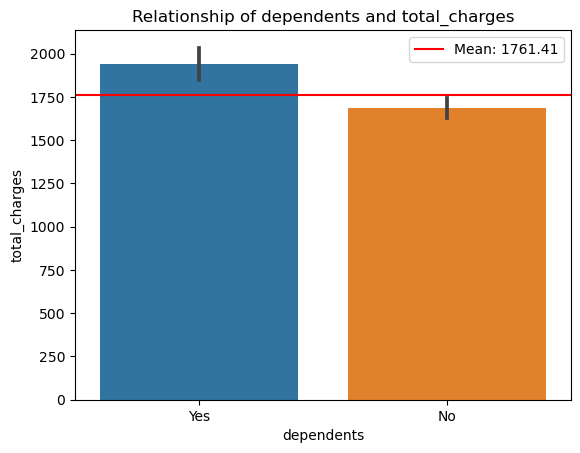

|       |      No |      Yes |
|:------|--------:|---------:|
| count | 4933    | 2110     |
| mean  | 1683.8  | 1942.85  |
| std   | 2122.21 | 2250.99  |
| min   |    1.2  |    0     |
| 25%   |  149.55 |  225.025 |
| 50%   |  639.7  |  860.35  |
| 75%   | 2542.45 | 3271.96  |
| max   | 8684.8  | 8672.45  |




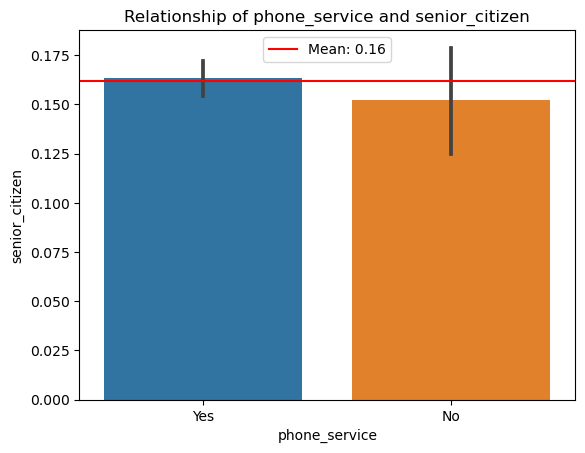

|       |         No |         Yes |
|:------|-----------:|------------:|
| count | 682        | 6361        |
| mean  |   0.152493 |    0.163182 |
| std   |   0.359762 |    0.369561 |
| min   |   0        |    0        |
| 25%   |   0        |    0        |
| 50%   |   0        |    0        |
| 75%   |   0        |    0        |
| max   |   1        |    1        |




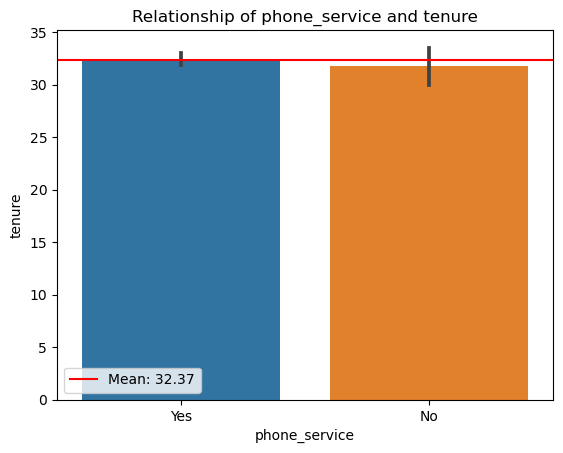

|       |       No |       Yes |
|:------|---------:|----------:|
| count | 682      | 6361      |
| mean  |  31.7375 |   32.4391 |
| std   |  24.2332 |   24.5951 |
| min   |   0      |    0      |
| 25%   |   8      |    9      |
| 50%   |  29      |   29      |
| 75%   |  53      |   56      |
| max   |  72      |   72      |




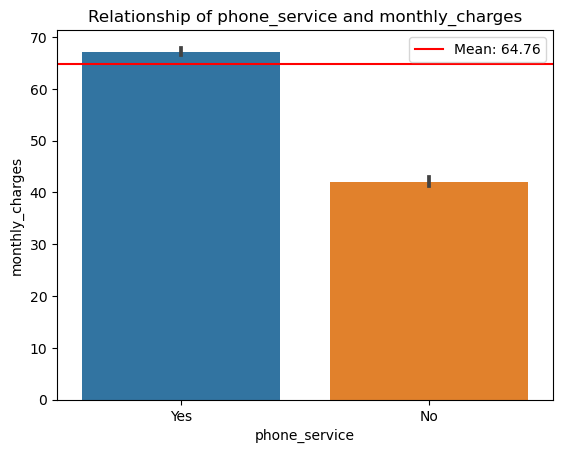

|       |       No |       Yes |
|:------|---------:|----------:|
| count | 682      | 6361      |
| mean  |  42.0286 |   67.199  |
| std   |  11.4196 |   30.4496 |
| min   |  23.45   |   18.25   |
| 25%   |  33.6    |   44.75   |
| 50%   |  40.575  |   74.7    |
| 75%   |  50.7375 |   91.25   |
| max   |  67.2    |  118.75   |




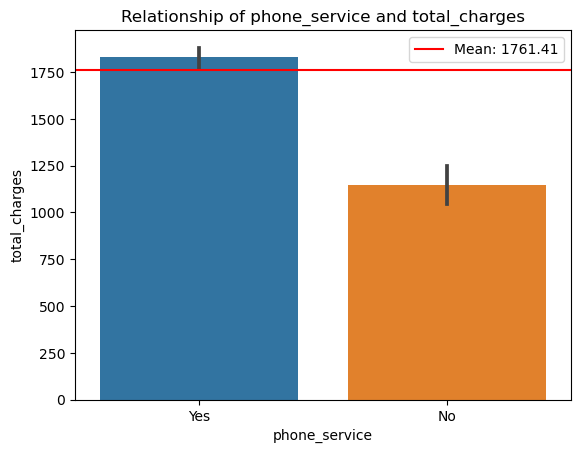

|       |       No |     Yes |
|:------|---------:|--------:|
| count |  682     | 6361    |
| mean  | 1146.04  | 1827.39 |
| std   | 1328.42  | 2225.86 |
| min   |    0     |    0    |
| 25%   |  118.425 |  171.9  |
| 50%   |  436.85  |  717.5  |
| 75%   | 1968.36  | 2867.75 |
| max   | 4919.7   | 8684.8  |




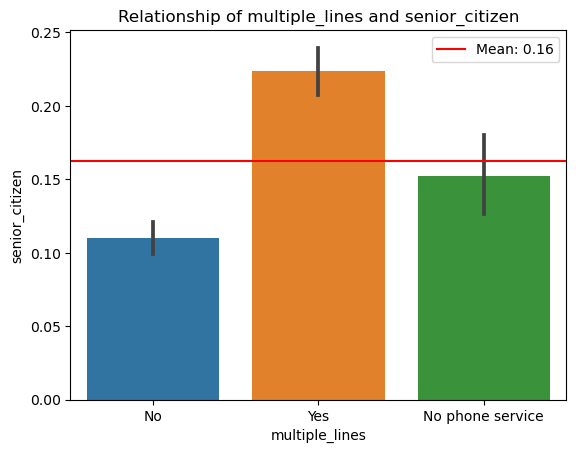

|       |          No |   No phone service |        Yes |
|:------|------------:|-------------------:|-----------:|
| count | 3390        |         682        | 2971       |
| mean  |    0.110029 |           0.152493 |    0.22383 |
| std   |    0.312973 |           0.359762 |    0.41688 |
| min   |    0        |           0        |    0       |
| 25%   |    0        |           0        |    0       |
| 50%   |    0        |           0        |    0       |
| 75%   |    0        |           0        |    0       |
| max   |    1        |           1        |    1       |




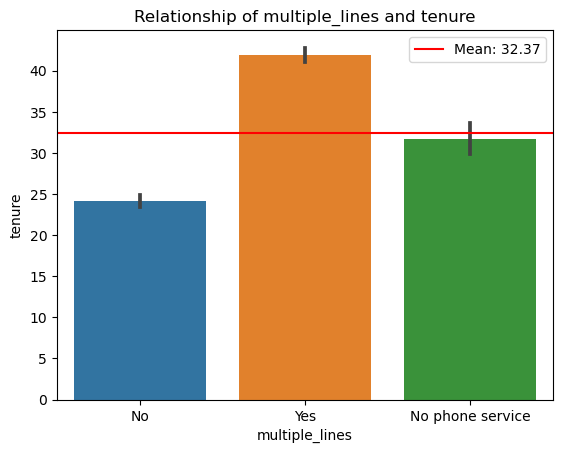

|       |        No |   No phone service |       Yes |
|:------|----------:|-------------------:|----------:|
| count | 3390      |           682      | 2971      |
| mean  |   24.1348 |            31.7375 |   41.9145 |
| std   |   22.2157 |            24.2332 |   23.7423 |
| min   |    0      |             0      |    0      |
| 25%   |    4      |             8      |   20      |
| 50%   |   17      |            29      |   45      |
| 75%   |   41      |            53      |   65      |
| max   |   72      |            72      |   72      |




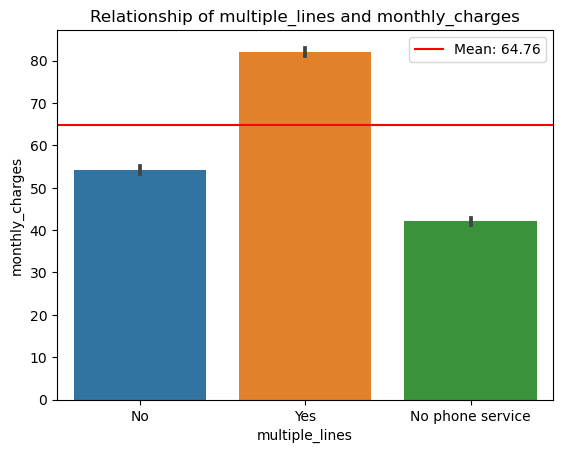

|       |        No |   No phone service |       Yes |
|:------|----------:|-------------------:|----------:|
| count | 3390      |           682      | 2971      |
| mean  |   54.1951 |            42.0286 |   82.037  |
| std   |   28.5808 |            11.4196 |   25.3005 |
| min   |   18.25   |            23.45   |   22.95   |
| 25%   |   20.25   |            33.6    |   74.15   |
| 50%   |   55.975  |            40.575  |   88.05   |
| 75%   |   78.9    |            50.7375 |  100.45   |
| max   |  112.2    |            67.2    |  118.75   |




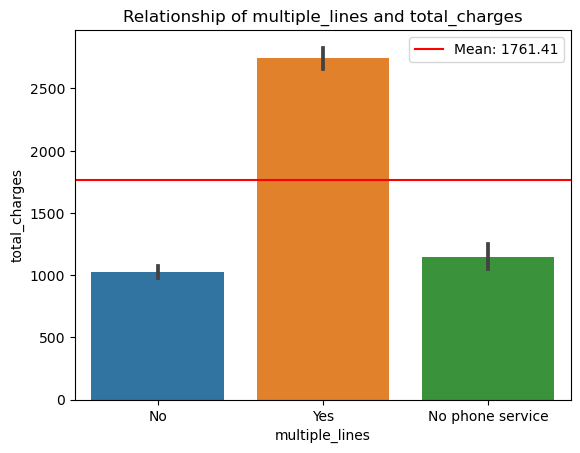

|       |        No |   No phone service |      Yes |
|:------|----------:|-------------------:|---------:|
| count | 3390      |            682     | 2971     |
| mean  | 1026.59   |           1146.04  | 2741.12  |
| std   | 1504.4    |           1328.42  | 2541.63  |
| min   |    0      |              0     |    0     |
| 25%   |   82.4375 |            118.425 |  485.825 |
| 50%   |  362.3    |            436.85  | 1743.5   |
| 75%   | 1277.28   |           1968.36  | 4914.05  |
| max   | 7854.9    |           4919.7   | 8684.8   |




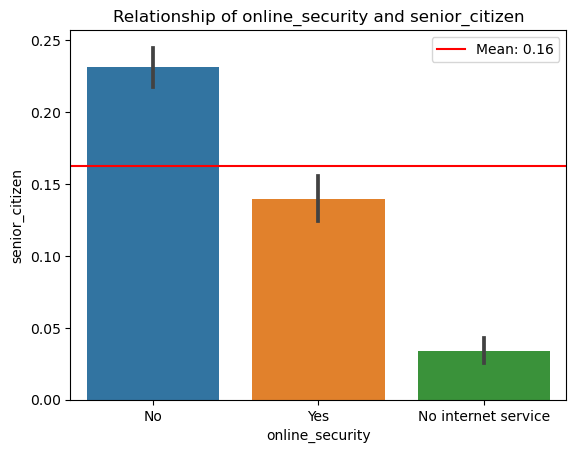

|       |          No |   No internet service |         Yes |
|:------|------------:|----------------------:|------------:|
| count | 3498        |           1526        | 2019        |
| mean  |    0.230989 |              0.034076 |    0.139673 |
| std   |    0.421526 |              0.181484 |    0.346733 |
| min   |    0        |              0        |    0        |
| 25%   |    0        |              0        |    0        |
| 50%   |    0        |              0        |    0        |
| 75%   |    0        |              0        |    0        |
| max   |    1        |              1        |    1        |




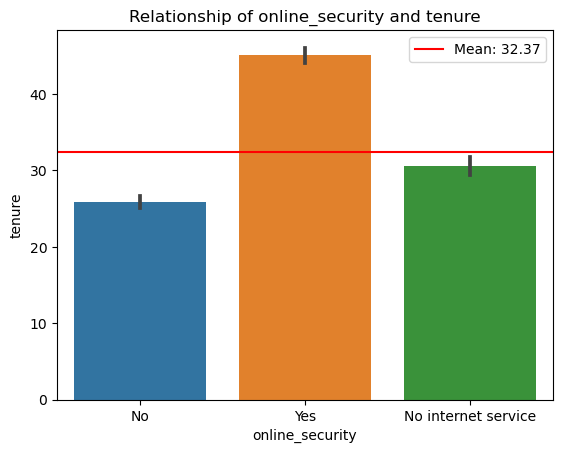

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3498      |             1526      | 2019      |
| mean  |   25.8508 |               30.5472 |   45.0466 |
| std   |   22.5662 |               24.3565 |   23.1752 |
| min   |    0      |                0      |    0      |
| 25%   |    5      |                8      |   25      |
| 50%   |   19      |               25      |   50      |
| 75%   |   44      |               52.75   |   67      |
| max   |   72      |               72      |   72      |




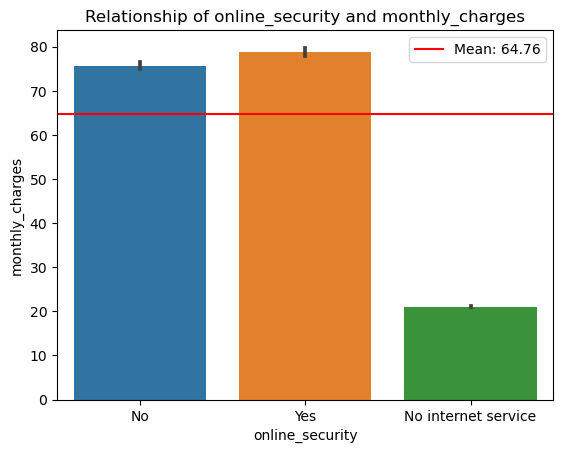

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3498      |            1526       | 2019      |
| mean  |   75.6931 |              21.0792  |   78.8387 |
| std   |   21.705  |               2.16422 |   22.1644 |
| min   |   23.45   |              18.25    |   28.5    |
| 25%   |   59.2125 |              19.7     |   60.6    |
| 50%   |   79.3    |              20.15    |   79.85   |
| 75%   |   93.9375 |              20.9     |   96.6    |
| max   |  114.1    |              26.9     |  118.75   |




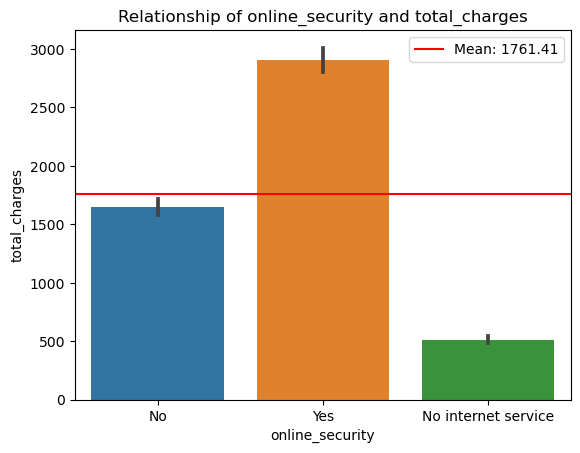

|       |       No |   No internet service |      Yes |
|:------|---------:|----------------------:|---------:|
| count | 3498     |              1526     | 2019     |
| mean  | 1646.13  |               512.302 | 2905.25  |
| std   | 2025.22  |               552.261 | 2549.89  |
| min   |    0     |                 0     |    0     |
| 25%   |  154.387 |                63.95  |  511.625 |
| 50%   |  635.55  |               251.625 | 2283.15  |
| 75%   | 2582.01  |               856.15  | 4975.3   |
| max   | 7998.8   |              1988.5   | 8684.8   |




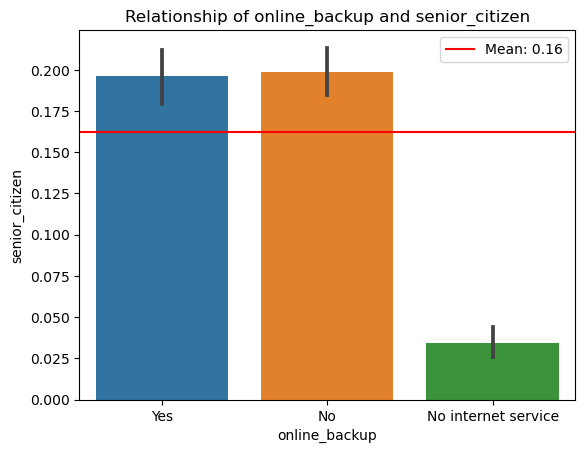

|       |          No |   No internet service |         Yes |
|:------|------------:|----------------------:|------------:|
| count | 3088        |           1526        | 2429        |
| mean  |    0.198834 |              0.034076 |    0.195965 |
| std   |    0.399188 |              0.181484 |    0.397024 |
| min   |    0        |              0        |    0        |
| 25%   |    0        |              0        |    0        |
| 50%   |    0        |              0        |    0        |
| 75%   |    0        |              0        |    0        |
| max   |    1        |              1        |    1        |




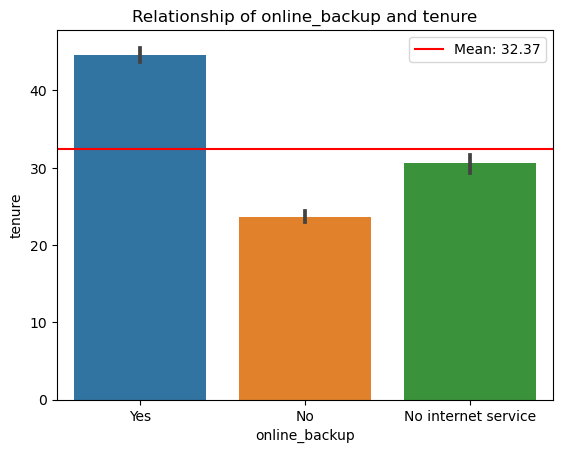

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3088      |             1526      | 2429      |
| mean  |   23.6807 |               30.5472 |   44.5653 |
| std   |   21.5516 |               24.3565 |   23.2237 |
| min   |    0      |                0      |    0      |
| 25%   |    4      |                8      |   25      |
| 50%   |   17      |               25      |   50      |
| 75%   |   39      |               52.75   |   66      |
| max   |   72      |               72      |   72      |




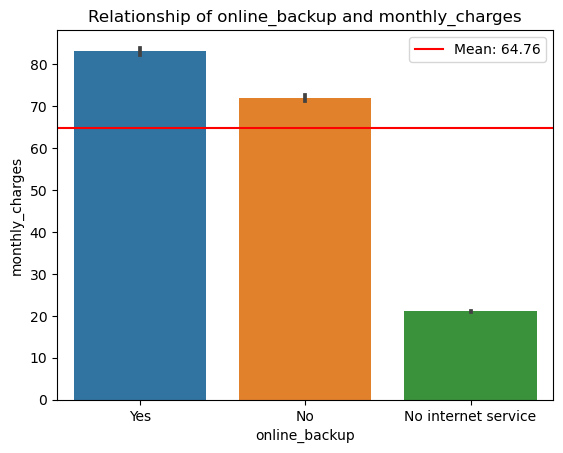

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3088      |            1526       | 2429      |
| mean  |   71.938  |              21.0792  |   83.0816 |
| std   |   21.0219 |               2.16422 |   21.4627 |
| min   |   23.45   |              18.25    |   28.45   |
| 25%   |   54.6    |              19.7     |   66.3    |
| 50%   |   74.75   |              20.15    |   85.8    |
| 75%   |   88.8125 |              20.9     |  100.7    |
| max   |  112.95   |              26.9     |  118.75   |




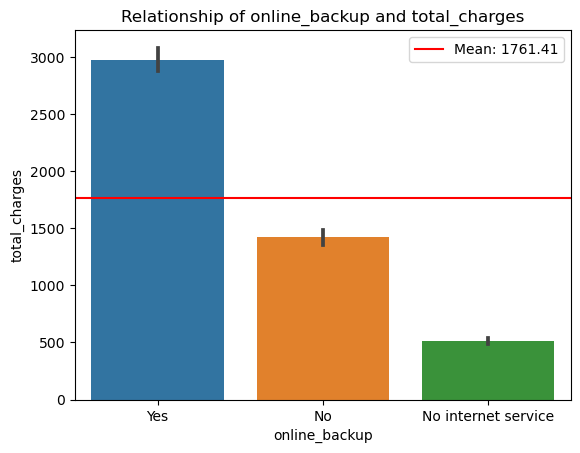

|       |       No |   No internet service |     Yes |
|:------|---------:|----------------------:|--------:|
| count | 3088     |              1526     | 2429    |
| mean  | 1423.63  |               512.302 | 2975.57 |
| std   | 1786.78  |               552.261 | 2596.04 |
| min   |    0     |                 0     |    0    |
| 25%   |  135.188 |                63.95  |  512.1  |
| 50%   |  564.375 |               251.625 | 2434.45 |
| 75%   | 2218.25  |               856.15  | 5236.4  |
| max   | 7881.2   |              1988.5   | 8684.8  |




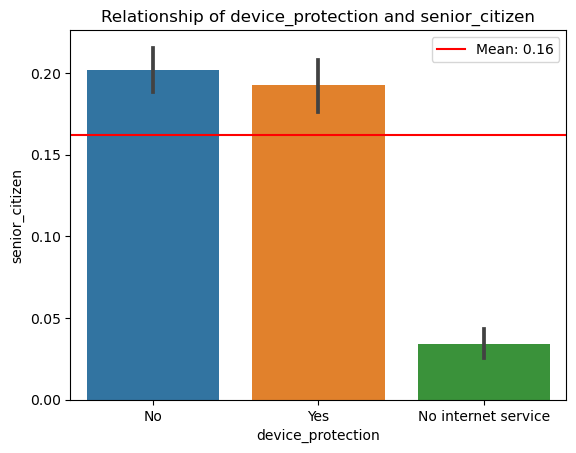

|       |          No |   No internet service |         Yes |
|:------|------------:|----------------------:|------------:|
| count | 3095        |           1526        | 2422        |
| mean  |    0.201616 |              0.034076 |    0.192403 |
| std   |    0.401271 |              0.181484 |    0.394269 |
| min   |    0        |              0        |    0        |
| 25%   |    0        |              0        |    0        |
| 50%   |    0        |              0        |    0        |
| 75%   |    0        |              0        |    0        |
| max   |    1        |              1        |    1        |




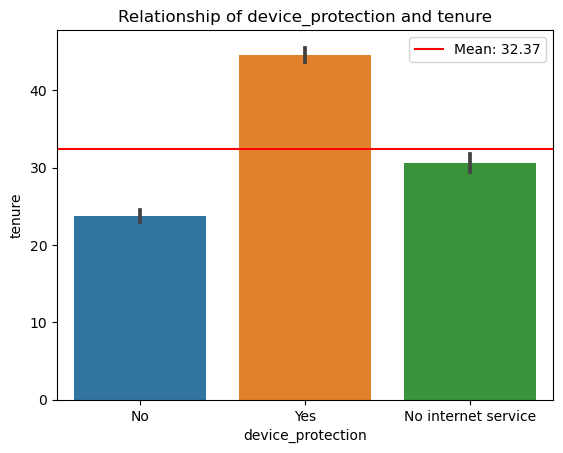

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3095      |             1526      | 2422      |
| mean  |   23.6969 |               30.5472 |   44.6049 |
| std   |   21.761  |               24.3565 |   22.9689 |
| min   |    0      |                0      |    0      |
| 25%   |    4      |                8      |   25      |
| 50%   |   17      |               25      |   49      |
| 75%   |   40      |               52.75   |   66      |
| max   |   72      |               72      |   72      |




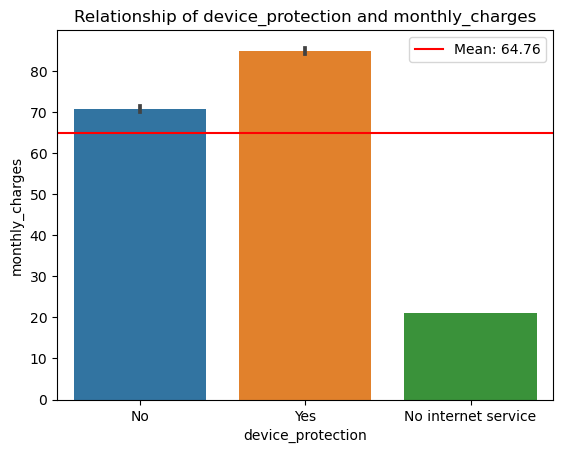

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3095      |            1526       | 2422      |
| mean  |   70.6011 |              21.0792  |   84.8223 |
| std   |   20.723  |               2.16422 |   20.8058 |
| min   |   23.45   |              18.25    |   29.1    |
| 25%   |   54.3    |              19.7     |   70.0125 |
| 50%   |   74      |              20.15    |   88.55   |
| 75%   |   86.05   |              20.9     |  102.6    |
| max   |  111.25   |              26.9     |  118.75   |




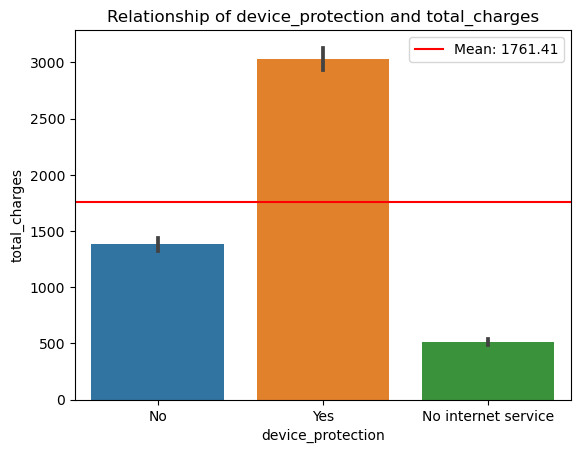

|       |      No |   No internet service |      Yes |
|:------|--------:|----------------------:|---------:|
| count | 3095    |              1526     | 2422     |
| mean  | 1381.34 |               512.302 | 3034.1   |
| std   | 1762.86 |               552.261 | 2584.13  |
| min   |    0    |                 0     |    0     |
| 25%   |  131.25 |                63.95  |  542.087 |
| 50%   |  531.15 |               251.625 | 2514     |
| 75%   | 2142.85 |               856.15  | 5265.43  |
| max   | 7919.8  |              1988.5   | 8684.8   |




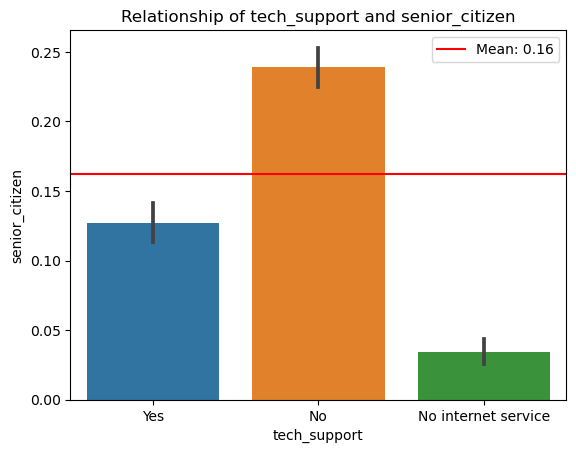

|       |          No |   No internet service |         Yes |
|:------|------------:|----------------------:|------------:|
| count | 3473        |           1526        | 2044        |
| mean  |    0.238986 |              0.034076 |    0.127202 |
| std   |    0.426526 |              0.181484 |    0.33328  |
| min   |    0        |              0        |    0        |
| 25%   |    0        |              0        |    0        |
| 50%   |    0        |              0        |    0        |
| 75%   |    0        |              0        |    0        |
| max   |    1        |              1        |    1        |




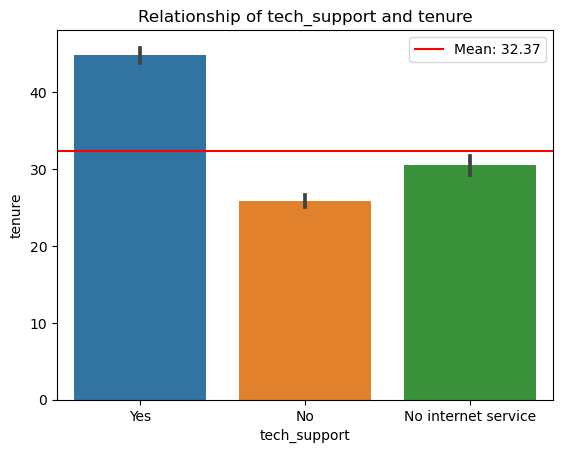

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3473      |             1526      | 2044      |
| mean  |   25.8442 |               30.5472 |   44.8229 |
| std   |   22.6082 |               24.3565 |   23.1853 |
| min   |    0      |                0      |    0      |
| 25%   |    5      |                8      |   25      |
| 50%   |   19      |               25      |   50      |
| 75%   |   45      |               52.75   |   67      |
| max   |   72      |               72      |   72      |




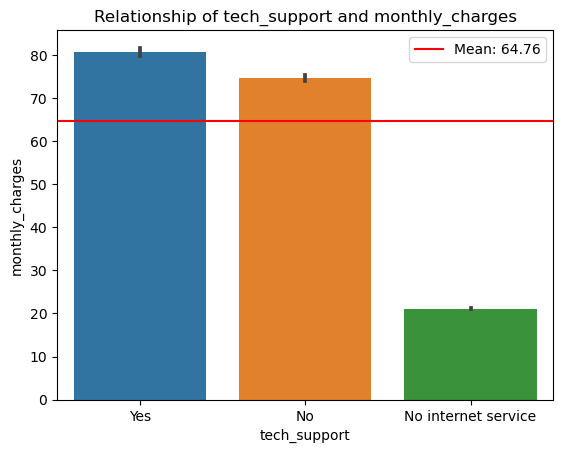

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 3473      |            1526       | 2044      |
| mean  |   74.5867 |              21.0792  |   80.6801 |
| std   |   21.4251 |               2.16422 |   22.2339 |
| min   |   23.45   |              18.25    |   28.6    |
| 25%   |   56.1    |              19.7     |   63.8875 |
| 50%   |   78.05   |              20.15    |   81.675  |
| 75%   |   91.7    |              20.9     |   99.9125 |
| max   |  113.2    |              26.9     |  118.75   |




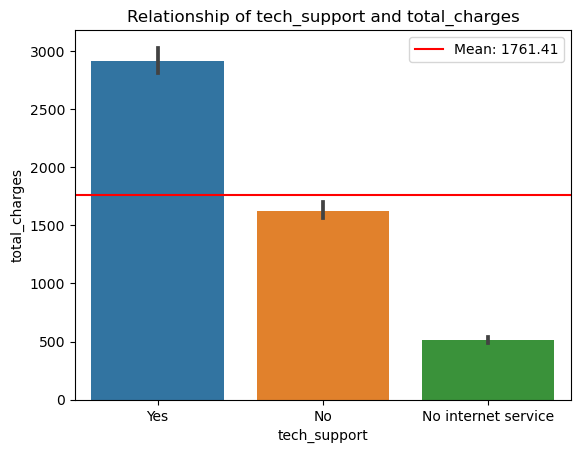

|       |      No |   No internet service |      Yes |
|:------|--------:|----------------------:|---------:|
| count | 3473    |              1526     | 2044     |
| mean  | 1628.64 |               512.302 | 2919.55  |
| std   | 1992.86 |               552.261 | 2576.3   |
| min   |    0    |                 0     |    0     |
| 25%   |  149.4  |                63.95  |  508.888 |
| 50%   |  641.25 |               251.625 | 2305.73  |
| 75%   | 2564.3  |               856.15  | 4974.09  |
| max   | 8165.1  |              1988.5   | 8684.8   |




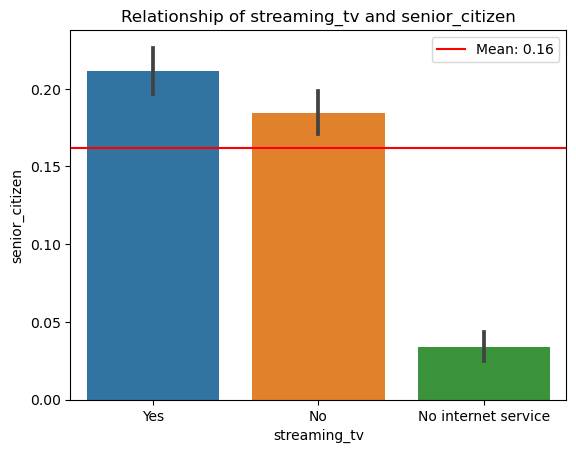

|       |          No |   No internet service |         Yes |
|:------|------------:|----------------------:|------------:|
| count | 2810        |           1526        | 2707        |
| mean  |    0.184342 |              0.034076 |    0.211304 |
| std   |    0.387832 |              0.181484 |    0.408309 |
| min   |    0        |              0        |    0        |
| 25%   |    0        |              0        |    0        |
| 50%   |    0        |              0        |    0        |
| 75%   |    0        |              0        |    0        |
| max   |    1        |              1        |    1        |




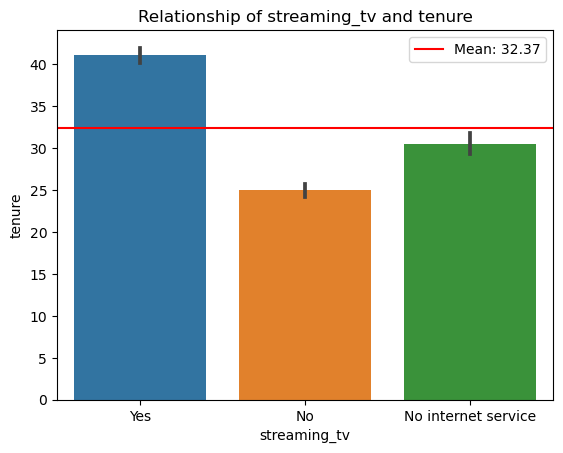

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 2810      |             1526      | 2707      |
| mean  |   24.9854 |               30.5472 |   41.0661 |
| std   |   22.6258 |               24.3565 |   23.8699 |
| min   |    0      |                0      |    0      |
| 25%   |    4      |                8      |   19      |
| 50%   |   18      |               25      |   44      |
| 75%   |   43      |               52.75   |   64      |
| max   |   72      |               72      |   72      |




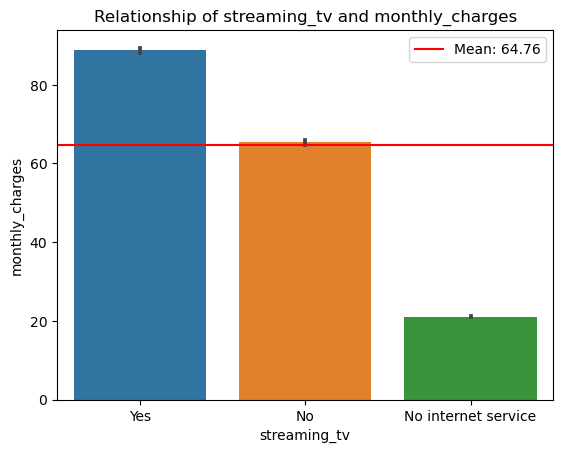

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 2810      |            1526       | 2707      |
| mean  |   65.3877 |              21.0792  |   88.7367 |
| std   |   18.7198 |               2.16422 |   18.3931 |
| min   |   23.45   |              18.25    |   33.75   |
| 25%   |   50.4    |              19.7     |   79.15   |
| 50%   |   69.6    |              20.15    |   93.2    |
| 75%   |   79.9875 |              20.9     |  103.05   |
| max   |  107.45   |              26.9     |  118.75   |




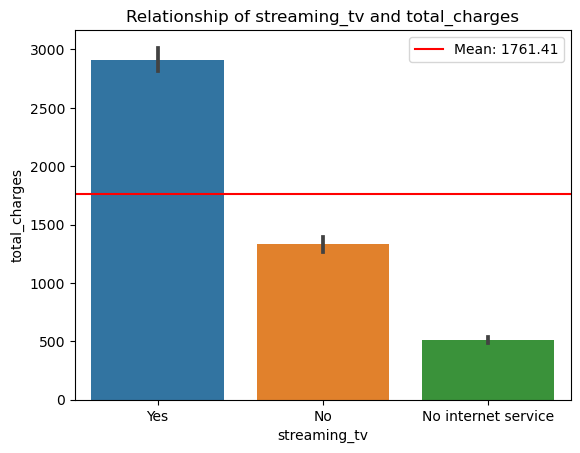

|       |       No |   No internet service |      Yes |
|:------|---------:|----------------------:|---------:|
| count | 2810     |              1526     | 2707     |
| mean  | 1329.87  |               512.302 | 2913.52  |
| std   | 1669.35  |               552.261 | 2593.95  |
| min   |    0     |                 0     |    0     |
| 25%   |  131.738 |                63.95  |  491.025 |
| 50%   |  517.175 |               251.625 | 2263.45  |
| 75%   | 1975.59  |               856.15  | 5187.88  |
| max   | 7748.75  |              1988.5   | 8684.8   |




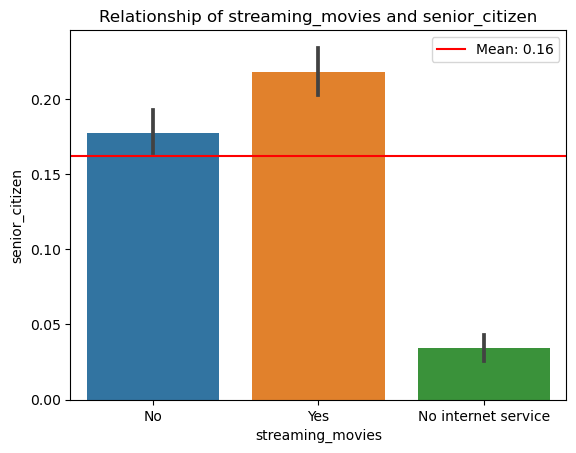

|       |          No |   No internet service |         Yes |
|:------|------------:|----------------------:|------------:|
| count | 2785        |           1526        | 2732        |
| mean  |    0.177738 |              0.034076 |    0.217789 |
| std   |    0.382361 |              0.181484 |    0.412819 |
| min   |    0        |              0        |    0        |
| 25%   |    0        |              0        |    0        |
| 50%   |    0        |              0        |    0        |
| 75%   |    0        |              0        |    0        |
| max   |    1        |              1        |    1        |




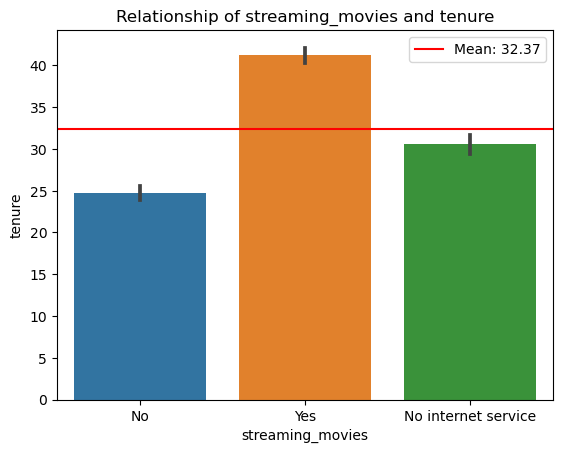

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 2785      |             1526      | 2732      |
| mean  |   24.7124 |               30.5472 |   41.1973 |
| std   |   22.4673 |               24.3565 |   23.8715 |
| min   |    0      |                0      |    0      |
| 25%   |    4      |                8      |   19      |
| 50%   |   18      |               25      |   45      |
| 75%   |   42      |               52.75   |   64      |
| max   |   72      |               72      |   72      |




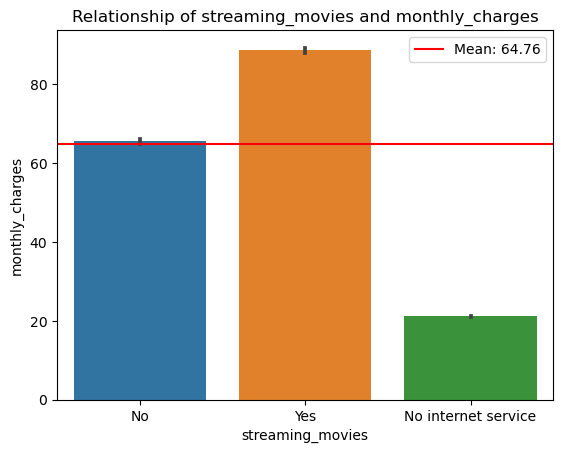

|       |        No |   No internet service |       Yes |
|:------|----------:|----------------------:|----------:|
| count | 2785      |            1526       | 2732      |
| mean  |   65.4341 |              21.0792  |   88.4757 |
| std   |   18.7123 |               2.16422 |   18.5966 |
| min   |   23.45   |              18.25    |   33.9    |
| 25%   |   50.5    |              19.7     |   78.9875 |
| 50%   |   69.65   |              20.15    |   93.2    |
| 75%   |   79.9    |              20.9     |  102.963  |
| max   |  106.75   |              26.9     |  118.75   |




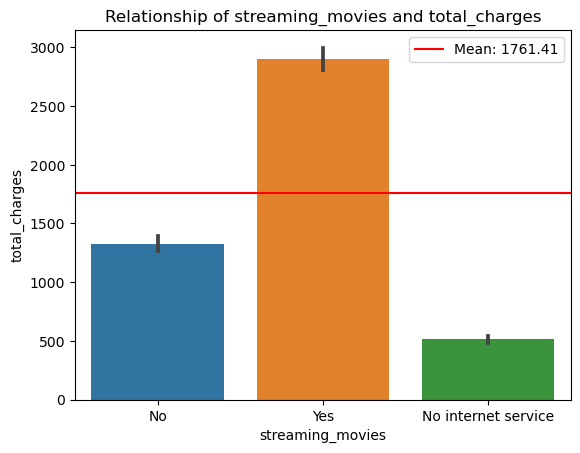

|       |      No |   No internet service |     Yes |
|:------|--------:|----------------------:|--------:|
| count | 2785    |              1526     | 2732    |
| mean  | 1327.82 |               512.302 | 2901.12 |
| std   | 1667.04 |               552.261 | 2591.62 |
| min   |    0    |                 0     |    0    |
| 25%   |  128.9  |                63.95  |  494    |
| 50%   |  497.3  |               251.625 | 2263.97 |
| 75%   | 1971.15 |               856.15  | 5166.68 |
| max   | 7657.4  |              1988.5   | 8684.8  |




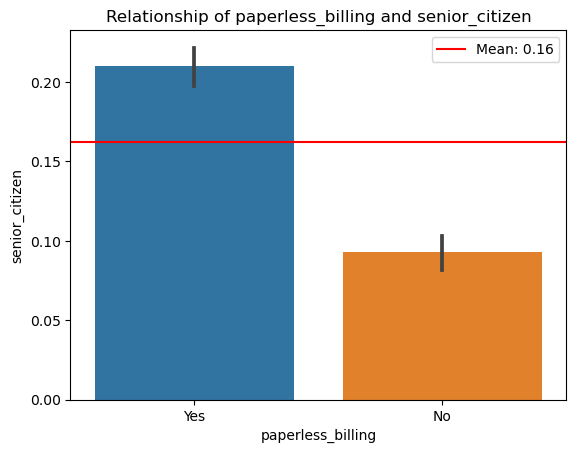

|       |           No |         Yes |
|:------|-------------:|------------:|
| count | 2872         | 4171        |
| mean  |    0.0926184 |    0.210022 |
| std   |    0.289947  |    0.407372 |
| min   |    0         |    0        |
| 25%   |    0         |    0        |
| 50%   |    0         |    0        |
| 75%   |    0         |    0        |
| max   |    1         |    1        |




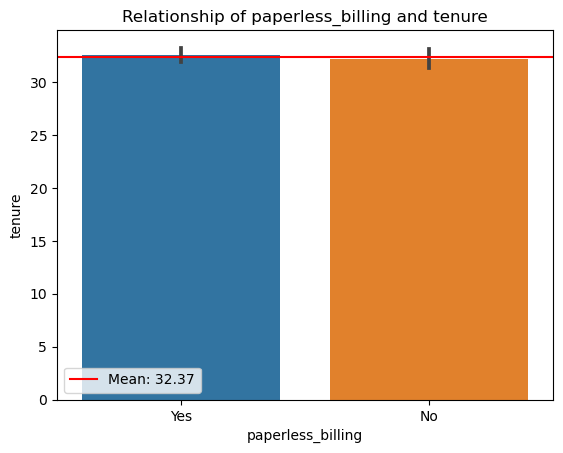

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 2872      | 4171      |
| mean  |   32.1891 |   32.4965 |
| std   |   24.6309 |   24.5124 |
| min   |    0      |    0      |
| 25%   |    8      |    9      |
| 50%   |   29      |   29      |
| 75%   |   55      |   56      |
| max   |   72      |   72      |




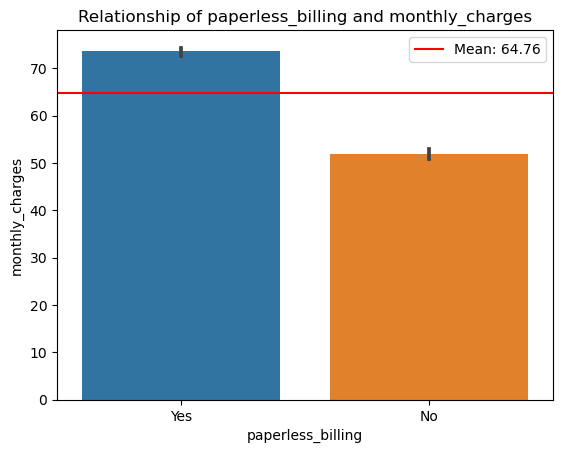

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 2872      | 4171      |
| mean  |   51.993  |   73.5538 |
| std   |   29.6979 |   27.0585 |
| min   |   18.25   |   18.55   |
| 25%   |   20.45   |   54.925  |
| 50%   |   50.175  |   79.45   |
| 75%   |   78.125  |   94.925  |
| max   |  118.6    |  118.75   |




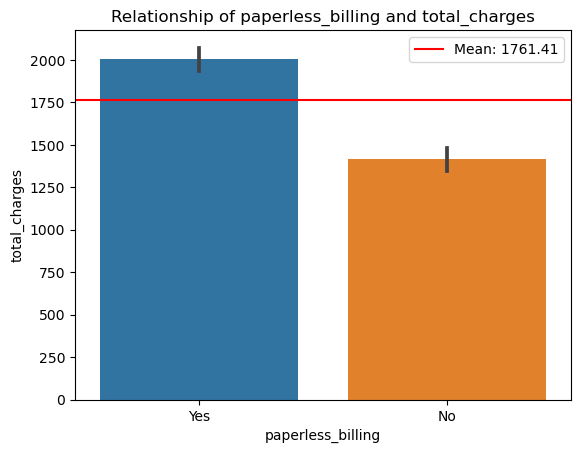

|       |       No |      Yes |
|:------|---------:|---------:|
| count | 2872     | 4171     |
| mean  | 1412.95  | 2001.35  |
| std   | 1900.93  | 2298.72  |
| min   |    0     |    0     |
| 25%   |  125.762 |  218.525 |
| 50%   |  537.125 |  829.1   |
| 75%   | 1795.38  | 3428.2   |
| max   | 8375.5   | 8684.8   |




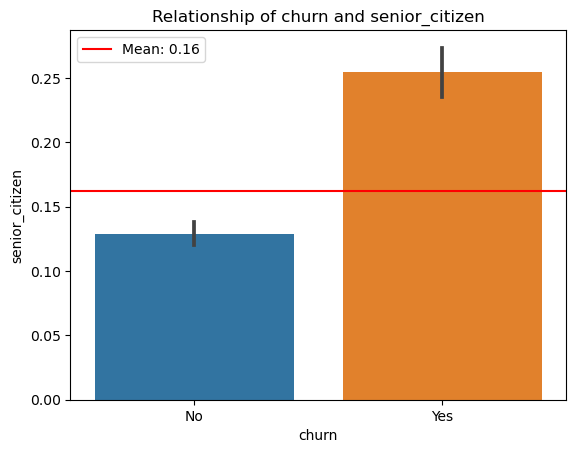

|       |          No |         Yes |
|:------|------------:|------------:|
| count | 5174        | 1869        |
| mean  |    0.128721 |    0.254682 |
| std   |    0.334923 |    0.435799 |
| min   |    0        |    0        |
| 25%   |    0        |    0        |
| 50%   |    0        |    0        |
| 75%   |    0        |    1        |
| max   |    1        |    1        |




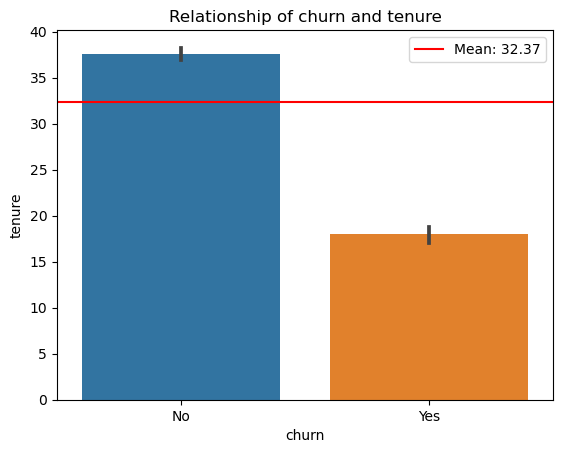

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 5174      | 1869      |
| mean  |   37.57   |   17.9791 |
| std   |   24.1138 |   19.5311 |
| min   |    0      |    1      |
| 25%   |   15      |    2      |
| 50%   |   38      |   10      |
| 75%   |   61      |   29      |
| max   |   72      |   72      |




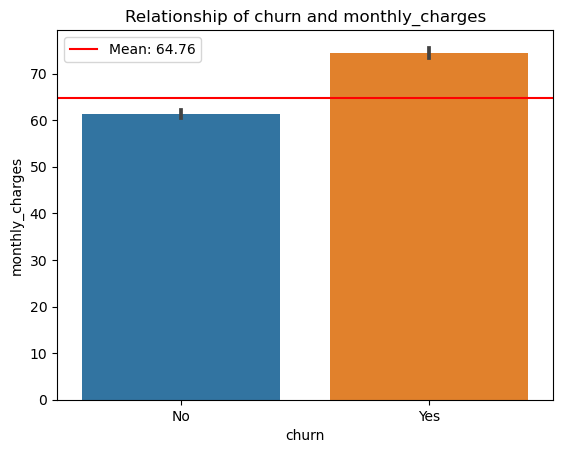

|       |        No |       Yes |
|:------|----------:|----------:|
| count | 5174      | 1869      |
| mean  |   61.2651 |   74.4413 |
| std   |   31.0926 |   24.6661 |
| min   |   18.25   |   18.85   |
| 25%   |   25.1    |   56.15   |
| 50%   |   64.425  |   79.65   |
| 75%   |   88.4    |   94.2    |
| max   |  118.75   |  118.35   |




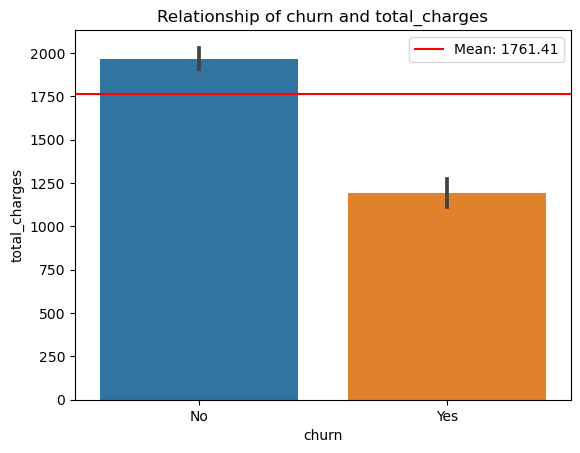

|       |       No |     Yes |
|:------|---------:|--------:|
| count | 5174     | 1869    |
| mean  | 1966.92  | 1192.49 |
| std   | 2256.78  | 1766.36 |
| min   |    0     |    1.25 |
| 25%   |  235.988 |   76.45 |
| 50%   |  854.625 |  331.9  |
| 75%   | 3313.96  | 1539.45 |
| max   | 8672.45  | 8684.8  |




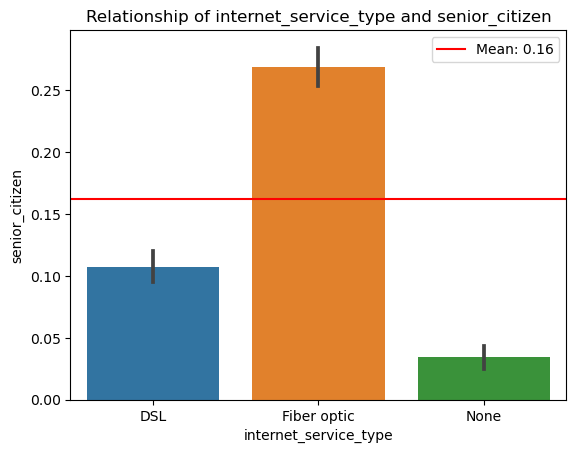

|       |         DSL |   Fiber optic |        None |
|:------|------------:|--------------:|------------:|
| count | 2421        |   3096        | 1526        |
| mean  |    0.106981 |      0.268411 |    0.034076 |
| std   |    0.309152 |      0.443204 |    0.181484 |
| min   |    0        |      0        |    0        |
| 25%   |    0        |      0        |    0        |
| 50%   |    0        |      0        |    0        |
| 75%   |    0        |      1        |    0        |
| max   |    1        |      1        |    1        |




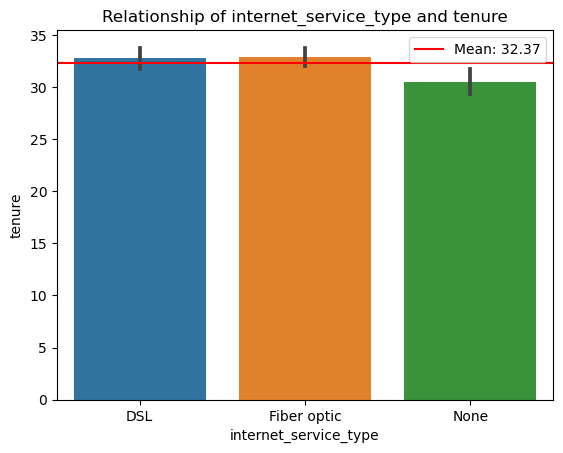

|       |       DSL |   Fiber optic |      None |
|:------|----------:|--------------:|----------:|
| count | 2421      |     3096      | 1526      |
| mean  |   32.8216 |       32.918  |   30.5472 |
| std   |   24.8122 |       24.4253 |   24.3565 |
| min   |    0      |        1      |    0      |
| 25%   |    9      |        9      |    8      |
| 50%   |   29      |       30      |   25      |
| 75%   |   56      |       56      |   52.75   |
| max   |   72      |       72      |   72      |




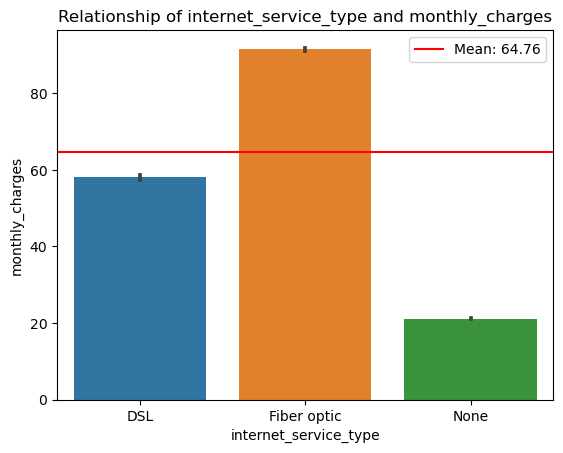

|       |       DSL |   Fiber optic |       None |
|:------|----------:|--------------:|-----------:|
| count | 2421      |     3096      | 1526       |
| mean  |   58.1022 |       91.5001 |   21.0792  |
| std   |   16.2595 |       12.663  |    2.16422 |
| min   |   23.45   |       67.75   |   18.25    |
| 25%   |   46.2    |       80.55   |   19.7     |
| 50%   |   56.15   |       91.675  |   20.15    |
| 75%   |   69.9    |      101.15   |   20.9     |
| max   |   94.8    |      118.75   |   26.9     |




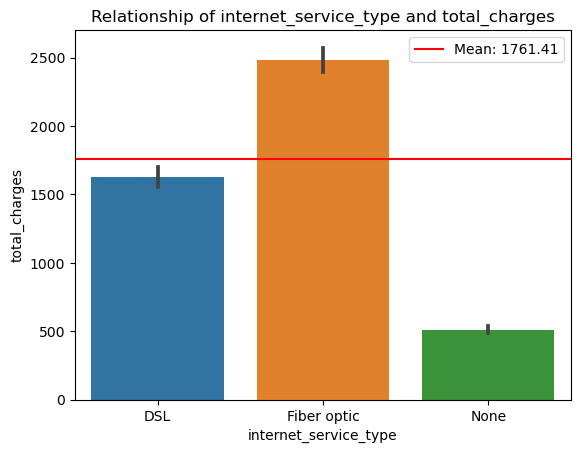

|       |     DSL |   Fiber optic |     None |
|:------|--------:|--------------:|---------:|
| count | 2421    |      3096     | 1526     |
| mean  | 1626.62 |      2482.49  |  512.302 |
| std   | 1835.73 |      2563.76  |  552.261 |
| min   |    0    |         1.25  |    0     |
| 25%   |  181.25 |       317.163 |   63.95  |
| 50%   |  679.85 |      1296.85  |  251.625 |
| 75%   | 2747.2  |      4529.07  |  856.15  |
| max   | 6859.5  |      8684.8   | 1988.5   |




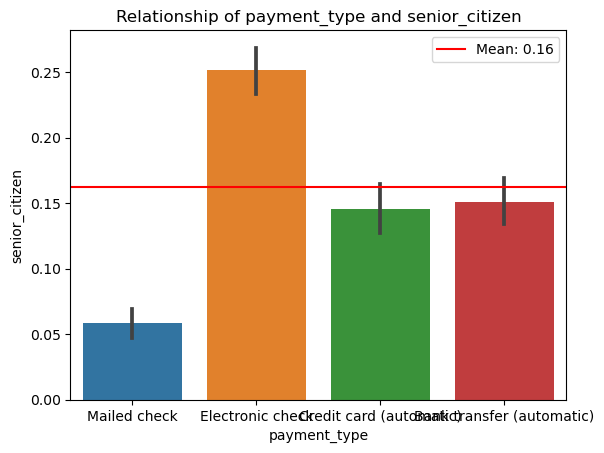

|       |   Bank transfer (automatic) |   Credit card (automatic) |   Electronic check |   Mailed check |
|:------|----------------------------:|--------------------------:|-------------------:|---------------:|
| count |                 1544        |               1522        |        2365        |   1612         |
| mean  |                    0.150907 |                  0.145204 |           0.251163 |      0.0583127 |
| std   |                    0.358074 |                  0.352422 |           0.433774 |      0.234406  |
| min   |                    0        |                  0        |           0        |      0         |
| 25%   |                    0        |                  0        |           0        |      0         |
| 50%   |                    0        |                  0        |           0        |      0         |
| 75%   |                    0        |                  0        |           1        |      0         |
| max   |                    1        |       

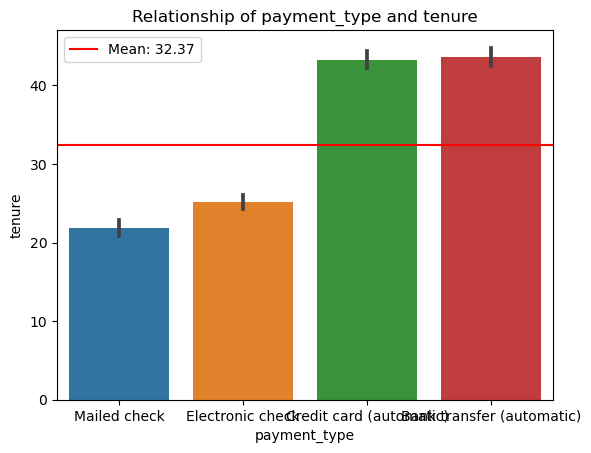

|       |   Bank transfer (automatic) |   Credit card (automatic) |   Electronic check |   Mailed check |
|:------|----------------------------:|--------------------------:|-------------------:|---------------:|
| count |                   1544      |                 1522      |          2365      |      1612      |
| mean  |                     43.6567 |                   43.2694 |            25.1746 |        21.83   |
| std   |                     23.1979 |                   23.3396 |            22.3823 |        21.2184 |
| min   |                      0      |                    0      |             1      |         0      |
| 25%   |                     23      |                   23      |             5      |         3      |
| 50%   |                     48      |                   47      |            18      |        15      |
| 75%   |                     66      |                   66      |            43      |        36      |
| max   |                     72      |       

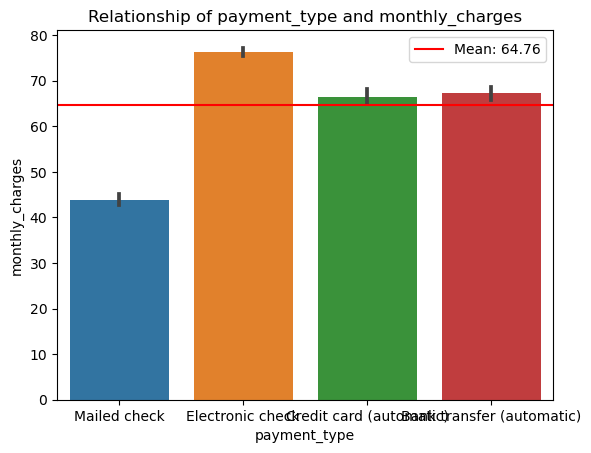

|       |   Bank transfer (automatic) |   Credit card (automatic) |   Electronic check |   Mailed check |
|:------|----------------------------:|--------------------------:|-------------------:|---------------:|
| count |                   1544      |                 1522      |          2365      |      1612      |
| mean  |                     67.1926 |                   66.5124 |            76.2558 |        43.9171 |
| std   |                     30.5552 |                   30.6124 |            24.0537 |        26.3147 |
| min   |                     18.4    |                   18.25   |            18.85   |        18.7    |
| 25%   |                     41.0875 |                   38.6625 |            60.15   |        20.15   |
| 50%   |                     73.1    |                   73.025  |            80.55   |        34.7    |
| 75%   |                     92.9625 |                   90.85   |            94.7    |        64.9125 |
| max   |                    118.75   |       

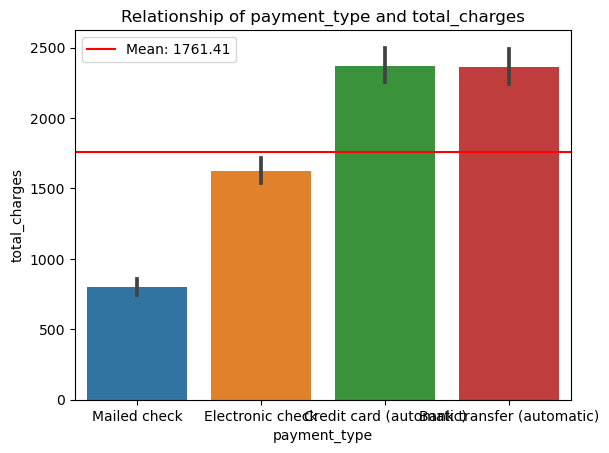

|       |   Bank transfer (automatic) |   Credit card (automatic) |   Electronic check |   Mailed check |
|:------|----------------------------:|--------------------------:|-------------------:|---------------:|
| count |                    1544     |                  1522     |            2365    |      1612      |
| mean  |                    2364.97  |                  2371.32  |            1627.57 |       803.823  |
| std   |                    2371.61  |                  2410.88  |            2072.56 |      1288.6    |
| min   |                       0     |                     0     |               1.4  |         0      |
| 25%   |                     380.825 |                   385.788 |             141.65 |        55.4625 |
| 50%   |                    1377.1   |                  1380.5   |             573.25 |       264.225  |
| 75%   |                    4140.38  |                  4179.18  |            2444.25 |       928.038  |
| max   |                    8684.8   |       

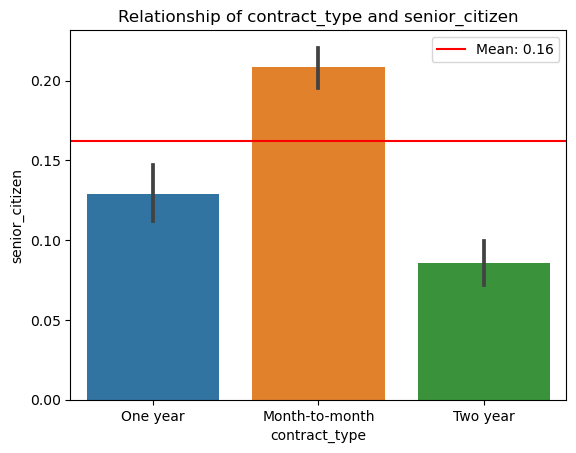

|       |   Month-to-month |    One year |     Two year |
|:------|-----------------:|------------:|-------------:|
| count |      3875        | 1473        | 1695         |
| mean  |         0.208258 |    0.128988 |    0.0855457 |
| std   |         0.406115 |    0.335301 |    0.279775  |
| min   |         0        |    0        |    0         |
| 25%   |         0        |    0        |    0         |
| 50%   |         0        |    0        |    0         |
| 75%   |         0        |    0        |    0         |
| max   |         1        |    1        |    1         |




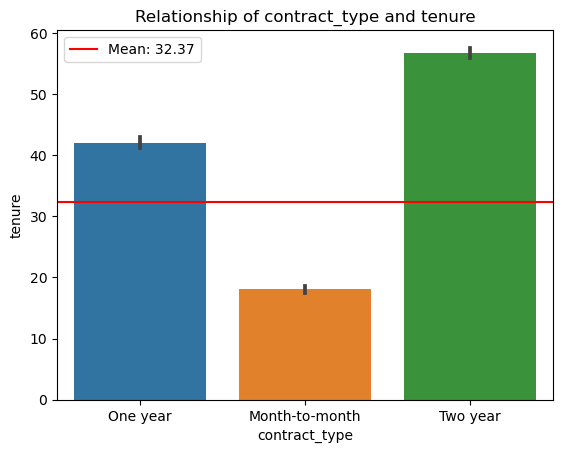

|       |   Month-to-month |   One year |   Two year |
|:------|-----------------:|-----------:|-----------:|
| count |        3875      |  1473      |  1695      |
| mean  |          18.0366 |    42.0448 |    56.7351 |
| std   |          17.6891 |    19.0359 |    18.2094 |
| min   |           1      |     0      |     0      |
| 25%   |           3      |    27      |    48      |
| 50%   |          12      |    44      |    64      |
| 75%   |          29      |    58      |    71      |
| max   |          72      |    72      |    72      |




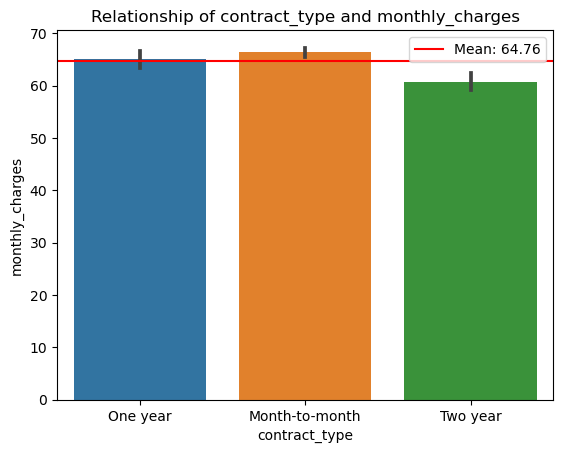

|       |   Month-to-month |   One year |   Two year |
|:------|-----------------:|-----------:|-----------:|
| count |        3875      |  1473      |  1695      |
| mean  |          66.3985 |    65.0486 |    60.7704 |
| std   |          26.9266 |    31.8405 |    34.6789 |
| min   |          18.75   |    18.25   |    18.4    |
| 25%   |          45.85   |    26.9    |    24.025  |
| 50%   |          73.25   |    68.75   |    64.35   |
| 75%   |          88.875  |    94.8    |    90.45   |
| max   |         117.45   |   118.6    |   118.75   |




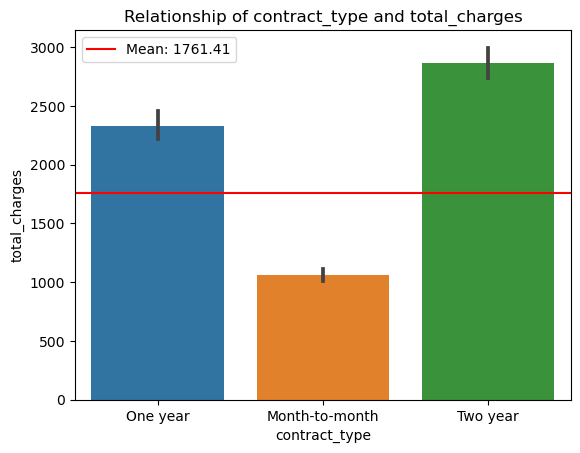

|       |   Month-to-month |   One year |   Two year |
|:------|-----------------:|-----------:|-----------:|
| count |          3875    |    1473    |   1695     |
| mean  |          1061.79 |    2329.99 |   2866.72  |
| std   |          1506.19 |    2268.4  |   2682.69  |
| min   |             1.2  |       0    |      0     |
| 25%   |            79.5  |     416.2  |    552.775 |
| 50%   |           346.4  |    1386.8  |   1558.65  |
| 75%   |          1442.4  |    4116.8  |   5322.88  |
| max   |          7713.55 |    8684.8  |   8672.45  |




In [96]:
explore.cat_vs_val(telco)

In [97]:
stats.chi2_contingency(pd.crosstab(telco.device_protection, telco.tenure // 12))

(1001.3903250906357,
 9.416498371414116e-207,
 12,
 array([[909.20843391, 460.09725969, 384.95243504, 328.70367741,
         360.34360358, 492.6160727 , 159.07851768],
        [448.28822945, 226.85247764, 189.80207298, 162.06843675,
         177.66860713, 242.88598609,  78.43418998],
        [711.50333665, 360.05026267, 301.24549198, 257.22788584,
         281.98778929, 385.49794122, 124.48729235]]))

Partner & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
    - Accept H$_a$, pval= 4.69e-212
Dependents & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
    - Accept H$_a$, pval= 4.51e-38
Multiple Lines & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
    - Accept H$_a$, pval= 3.79e-172
Online Security & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
    - Accept H$_a$, pval= 1.16e-167
Online Backup & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
    - Accept H$_a$, pval= 4.58e-206
Device Protection & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
    - Accept H$_a$, pval= 9.42e-207
Tech-Support & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
Streaming-TV & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
Streaming-Movies & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
Senior Citizen & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
Monthly Charges & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
Total Charges & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance
Contract Type & Tenure:
- H$_0$: There is no significance
- H$_a$: There is significance

- Values:
    - Majority non-senior citizen
    - Tenure tends to be either very short or very long
    - Monthly & total_charges seem to be low
- Categorical:
    - Majority no dependents
    - Majority has phone service
    - Majority month to month contract
- Cat vs. Val:
    - People with partners and/or dependents stay longer
    - People with multiple lines stay longer
    - People with online security stay longer
    - People with online backup stay longer
    - People with device protection stay longer
    - People with tech-support stay longer
    - People with streaming tv stay longer
    - People with streaming movies stay longer
    - Senior citizens stay longer
    - People that had less monthly charges stay longer
    - People with higher total charges stay longer
    - People with 1 or 2 year contracts stay longer

##### 1b. Determine if certain columns should be dropped

Only customer_id since it doesn't seem to play a purpose as of right now.

##### 1c. Determine if it would be valuable to bin some numeric columns

Get a total amount of extra services per customer

##### 1d. Determine if it would be valuable to combine multiple columns into one.

Get a total amount of extra services per customer

### 2. What are your drivers of churn?

Ironically, people who have more extra services, longer contracts, yet lower monthly costs seem to consistently remain with the company...

Because of this, I want to identify how people with lower monthly costs stay the longest even though the people who stay the longest also seem to have multiple extra services which in turn I'd imagine would cost more

### 3. Does it make sense to combine any features?

Not for right now

### 4. Do you find any surprises?

As stated earlier, somehow customers with less monthly charges, longer contracts, and more services stay the longest...

Perhaps the longer contract brings down the monthly charges just enough that even with the extra services, it still is cheaper than those without any additives?

### 5. Document any and all findings and takeaways in your notebook using markdown.

- Values:
    - Majority non-senior citizen
    - Tenure tends to be either very short or very long
    - Monthly & total_charges seem to be low
- Categorical:
    - Majority no dependents
    - Majority has phone service
    - Majority month to month contract
- Cat vs. Val:
    - People with partners and/or dependents stay longer
    - People with multiple lines stay longer
    - People with online security stay longer
    - People with online backup stay longer
    - People with device protection stay longer
    - People with tech-support stay longer
    - People with streaming tv stay longer
    - People with streaming movies stay longer
    - Senior citizens stay longer
    - People that had less monthly charges stay longer
    - People with higher total charges stay longer
    - People with 1 or 2 year contracts stay longer

Takeaway for churn:
- Has extra services
- Longer contracts
- Lower monthly costs
- Is a senior citizen
- Has dependents/partner

<a id="Misc"></a>
# Miscellaneous
<li><a href="#TableOfContents">Table of Contents</li></a>

In [98]:
# Total Services:
'''
phone_service
    phone_service_Yes
multiple_lines
    multiple_lines_Yes
online_security
    online_security_Yes
online_backup
    online_backup_Yes
device_protection
    device_protection_Yes
tech_support
    tech_support_Yes
streaming_tv
    streaming_tv_Yes
streaming_movies
    streaming_movies_Yes
internet_service_type
    internet_service_type_DSL
    internet_service_type_Fiber optic
'''
telco['total_services'] = (telco.phone_service_Yes 
                           + telco.multiple_lines_Yes
                           + telco.online_security_Yes 
                           + telco.online_backup_Yes
                           + telco.device_protection_Yes
                           + telco.tech_support_Yes
                           + telco.streaming_tv_Yes
                           + telco.streaming_movies_Yes 
                           + telco.internet_service_type_DSL 
                           + telco['internet_service_type_Fiber optic'])
telco.total_services

0       5
1       4
2       3
3       6
4       4
       ..
7038    4
7039    4
7040    3
7041    6
7042    6
Name: total_services, Length: 7043, dtype: uint8

In [99]:
# Extra Services:
'''
online_security
    online_security_Yes
online_backup
    online_backup_Yes
device_protection
    device_protection_Yes
tech_support
    tech_support_Yes
streaming_tv
    streaming_tv_Yes
streaming_movie
    streaming_movie_Yes
'''
telco['total_extra_services'] = (telco.online_security_Yes 
                                + telco.online_backup_Yes
                                + telco.device_protection_Yes
                                + telco.tech_support_Yes
                                + telco.streaming_tv_Yes
                                + telco.streaming_movies_Yes)
telco.total_extra_services

0       3
1       1
2       1
3       4
4       2
       ..
7038    2
7039    1
7040    1
7041    4
7042    5
Name: total_extra_services, Length: 7043, dtype: uint8

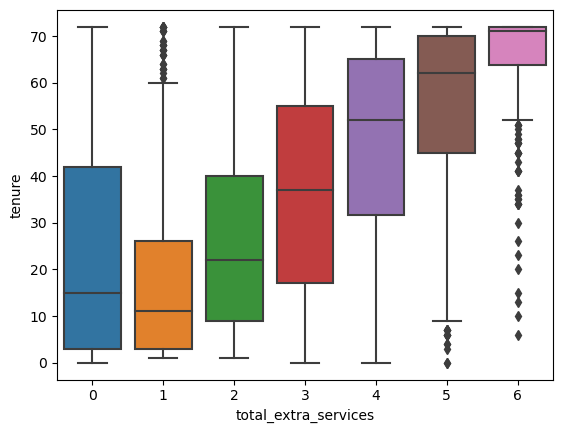

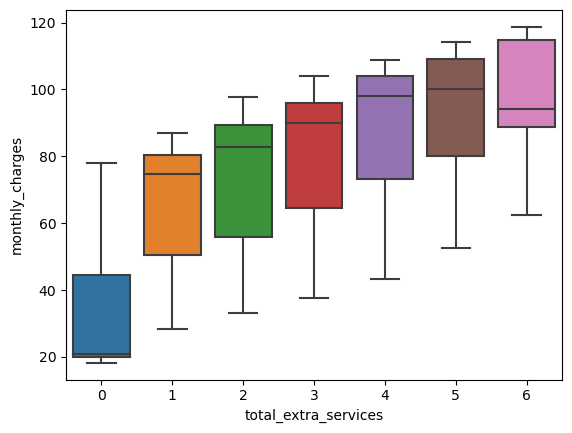

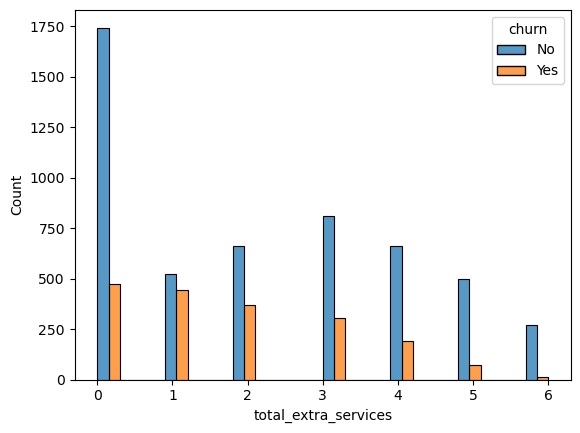

In [100]:
sns.boxplot(data=telco, x='total_extra_services', y='tenure')
plt.show()
sns.boxplot(data=telco, x='total_extra_services', y='monthly_charges')
plt.show()
sns.histplot(data=telco, x='total_extra_services', hue='churn', multiple='dodge')
plt.show()

In [101]:
telco.groupby('total_extra_services').sum()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,total_services
total_extra_services,,,,,,,,,,,,,,,,,,,,,
0,209,53547,72767.45,1126164.20,1079.0,1140.0,1296.0,923.0,1467.0,752.0,...,399.0,1526.0,422.0,409.0,471.0,917.0,1194.0,384.0,641.0,3384.0
1,197,16295,63344.75,831889.35,486.0,480.0,645.0,321.0,774.0,192.0,...,551.0,0.0,153.0,146.0,487.0,180.0,877.0,69.0,20.0,3144.0
2,216,26902,74807.25,1512399.80,515.0,518.0,587.0,446.0,783.0,250.0,...,579.0,0.0,189.0,189.0,473.0,182.0,784.0,193.0,56.0,4424.0
3,222,40999,89563.55,2498111.15,538.0,580.0,516.0,602.0,799.0,319.0,...,643.0,0.0,256.0,248.0,462.0,152.0,627.0,320.0,171.0,6014.0
4,173,40228,74781.35,2771893.20,419.0,433.0,333.0,519.0,581.0,271.0,...,493.0,0.0,248.0,219.0,287.0,98.0,287.0,301.0,264.0,5511.0
5,86,31556,52632.50,2207251.50,303.0,268.0,191.0,380.0,362.0,209.0,...,290.0,0.0,171.0,198.0,148.0,54.0,97.0,169.0,305.0,4270.0
6,39,18463,28219.75,1457902.45,148.0,136.0,73.0,211.0,167.0,117.0,...,141.0,0.0,105.0,113.0,37.0,29.0,9.0,37.0,238.0,2455.0


In [102]:
telco.groupby('total_extra_services')['monthly_charges'].mean()

total_extra_services
0    32.792902
1    65.574275
2    72.417473
3    80.110510
4    87.771538
5    92.176007
6    99.365317
Name: monthly_charges, dtype: float64